In [1]:
# Created 20Mar23
# To create df of clinics system sizes for heatmaps of S1-S4 with mean LCUE
# Second part of this code is for plotting
# See Jupyter notebook: 'lcue_clinics_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'trial_heatmap.py'


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s1 = s1[s1.Institution != 'School']
# to check there are 18 clinics
clinics_s1["Site_name"].count()  # returns 18

18

In [3]:
clinics_s1["LCUE"].describe().round(2)  # to know LCUE values (all clinics)

count    18.00
mean      0.91
std       0.53
min       0.56
25%       0.65
50%       0.76
75%       0.96
max       2.87
Name: LCUE, dtype: float64

In [4]:
clinics_s1 # to show in Jupyter df of clinics only 

Site_name        County  Initial_PV_size  \
13                   Boyani_Dispensary        Kilifi            1.855   
16                     Busa_Dispensary         Kwale            1.590   
18              Chingombero_Dispensary         Kwale            1.590   
21             Dadacha_Basa_Dispensary        Isiolo            3.180   
39   Isiolo_Samburu_Complex_Dispensary        Isiolo            2.120   
54                Kavunyalo_Dispensary        Kilifi            2.650   
78                Mabesheni_Dispensary         Kwale            1.855   
86                 Makamini_Dispensary         Kwale            0.795   
98                   Mazola_Dispensary         Kwale            1.325   
102                  Mbulia_Dispensary  Taita_Taveta            0.530   
106        Mgange_Dawida_Health_centre  Taita_Taveta            2.385   
107         Mgange_Nyika_health_centre  Taita_Taveta            5.830   
120                  Mtumwa_Dispensary         Kwale            2.650   
133             Mwembe_Kati_Dispensary        Kilifi            2.120   
147              Sagalla_Health_Centre  Taita_Taveta            3.975   
148               Saghaighu_dispensary  Taita_Taveta            1.590   
151               Shakahola_Dispensary        Kilifi            1.855   
162            Werugha_Health_facility  Taita_Taveta            3.180   

     Initial_storage_size  Final_PV_size  Final_storage_size   LCUE  \
13                    6.0          1.577               5.631  0.644   
16                    8.0          1.352               7.644  0.797   
18                    5.0          1.352               4.774  0.781   
21                    9.0          2.703               8.500  0.602   
39                    8.0          1.802               7.707  0.920   
54                    8.0          2.253               7.423  0.606   
78                    6.0          1.577               5.526  0.560   
86                    5.0          0.676               4.853  1.165   
98                    5.0          1.126               4.757  0.926   
102                   3.0          0.450               2.816  0.991   
106                  15.0          2.027              14.658  1.176   
107                  29.0          4.956              28.698  2.873   
120                   8.0          2.253               7.471  0.655   
133                   6.0          1.802               5.666  0.653   
147                  16.0          3.379              15.398  0.970   
148                  10.0          1.352               9.653  0.733   
151                   7.0          1.577               6.538  0.624   
162                  11.0          2.703              10.400  0.709   

     Emissions_intensity  Cumulative_system_cost  Cumulative_system_GHG  \
13               262.819                5472.092               3975.885   
16               281.034                6030.762               3775.330   
18               317.942                5263.392               3817.330   
21               287.923                7553.742               6408.660   
39               381.616                6771.052               4988.440   
54               273.499                6796.082               5457.550   
78               227.878                5472.092               3975.885   
86               329.808                4331.772               2183.665   
98               332.146                4714.432               3024.775   
102              252.766                3390.442               1543.110   
106              423.516                9587.382               6178.995   
107             1252.262               18039.932              13930.210   
120              304.263                7511.342               6201.550   
133              285.955                5663.422               4396.440   
147              436.578               11467.992               9184.325   
148              243.687                6780.762               3995.330   
151             

In [5]:
# LCUE:
# Groups clinics by Initial storage and PV size and calculates average LCUE in that bin
lcue_clinics_s1 = clinics_s1.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_clinics_s1 = lcue_clinics_s1.to_frame()
lcue_clinics_s1 # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size        
3.0                  0.530            0.9910
5.0                  0.795            1.1650
                     1.325            0.9260
                     1.590            0.7810
6.0                  1.855            0.6020
                     2.120            0.6530
7.0                  1.855            0.6240
8.0                  1.590            0.7970
                     2.120            0.9200
                     2.650            0.6305
9.0                  3.180            0.6020
10.0                 1.590            0.7330
11.0                 3.180            0.7090
15.0                 2.385            1.1760
16.0                 3.975            0.9700
29.0                 5.830            2.8730

In [6]:
# to know clinics min and max average LCUE values (vmin & vmax)
lcue_clinics_s1["LCUE"].describe().round(3)
                    # returns: min= 0.602 (vmin), max= 2.873 (vmax)
                    # returns count != than 18 because some sites have same size

count    16.000
mean      0.947
std       0.547
min       0.602
25%       0.647
50%       0.789
75%       0.975
max       2.873
Name: LCUE, dtype: float64

In [7]:
# Pivot df to be able to do heatmap
lcue_clinics_s1_hp = lcue_clinics_s1.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_clinics_s1_hp # to show in Jupyter

Initial_PV_size       0.530  0.795  1.325  1.590  1.855  2.120  2.385   2.650  \
Initial_storage_size                                                            
3.0                   0.991    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
5.0                     NaN  1.165  0.926  0.781    NaN    NaN    NaN     NaN   
6.0                     NaN    NaN    NaN    NaN  0.602  0.653    NaN     NaN   
7.0                     NaN    NaN    NaN    NaN  0.624    NaN    NaN     NaN   
8.0                     NaN    NaN    NaN  0.797    NaN  0.920    NaN  0.6305   
9.0                     NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
10.0                    NaN    NaN    NaN  0.733    NaN    NaN    NaN     NaN   
11.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
15.0                    NaN    NaN    NaN    NaN    NaN    NaN  1.176     NaN   
16.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
29.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   

Initial_PV_size       3.180  3.975  5.830  
Initial_storage_size                       
3.0                     NaN    NaN    NaN  
5.0                     NaN    NaN    NaN  
6.0                     NaN    NaN    NaN  
7.0                     NaN    NaN    NaN  
8.0                     NaN    NaN    NaN  
9.0                   0.602    NaN    NaN  
10.0                    NaN    NaN    NaN  
11.0                  0.709    NaN    NaN  
15.0                    NaN    NaN    NaN  
16.0                    NaN   0.97    NaN  
29.0                    NaN    NaN  2.873

In [8]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

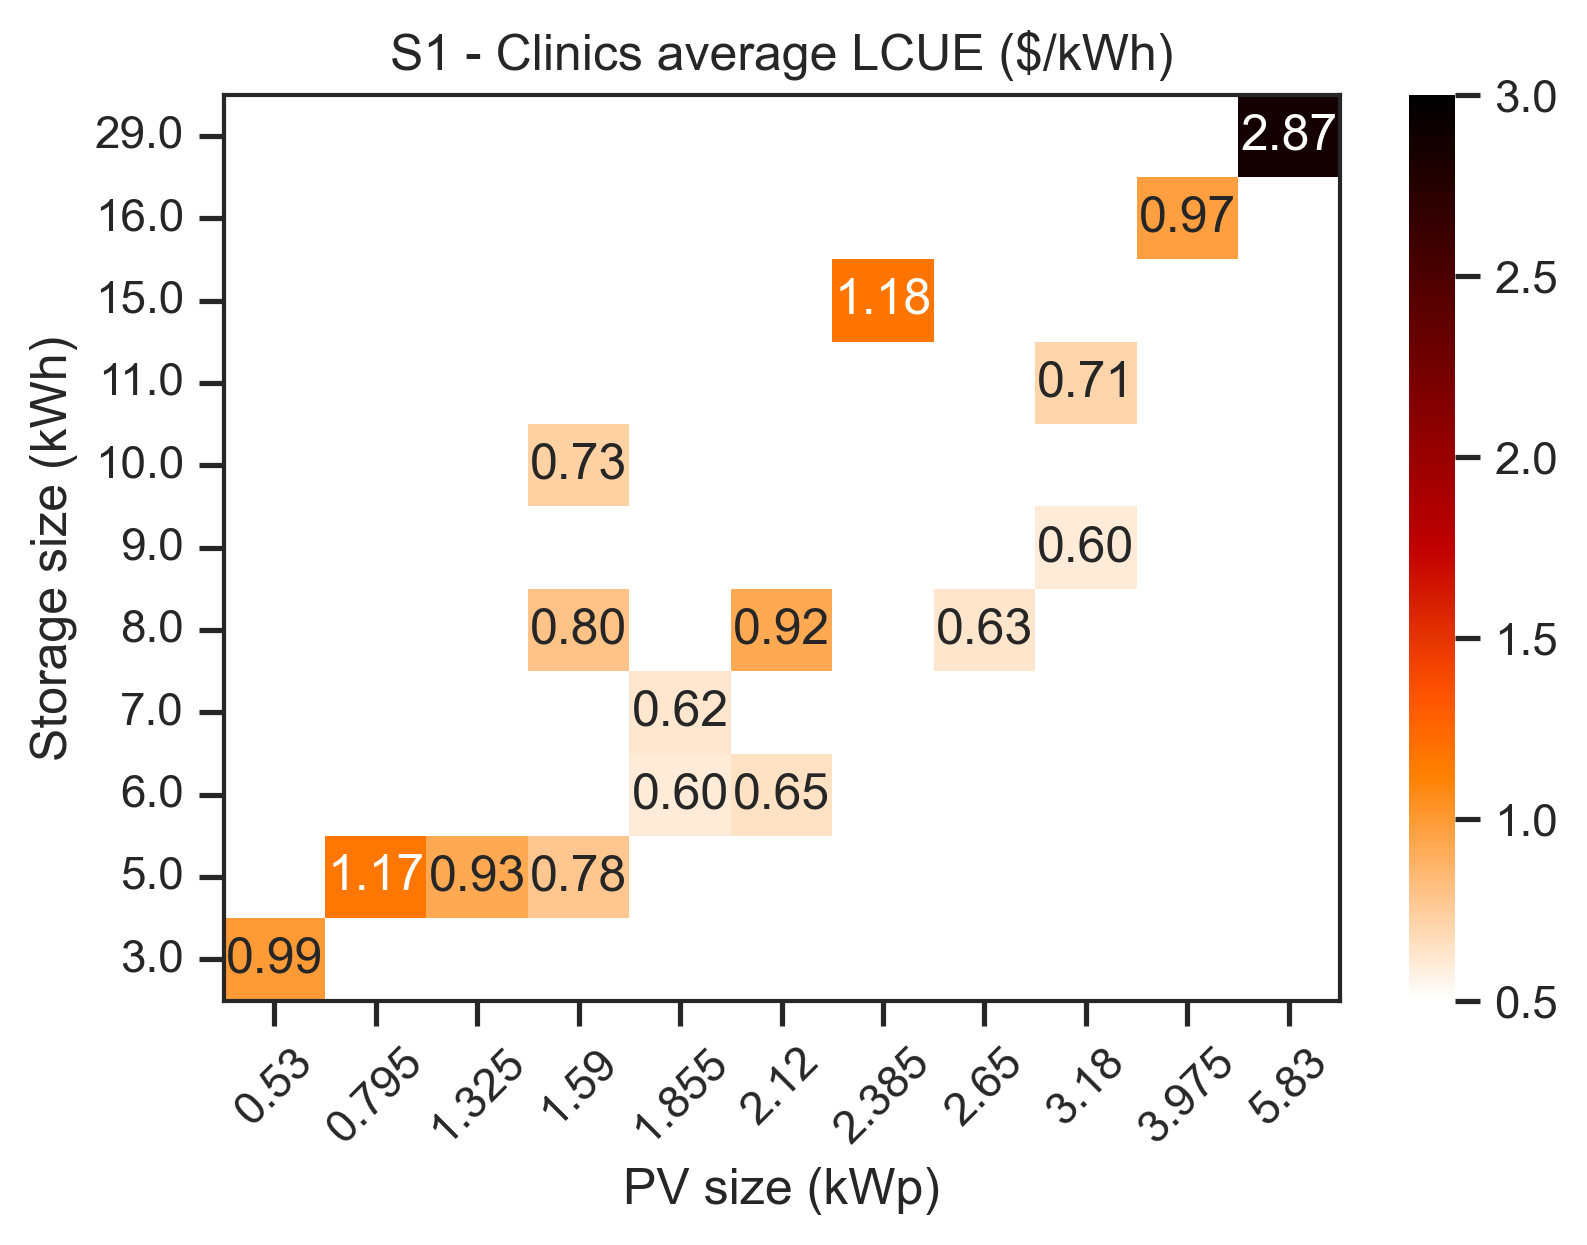

In [11]:
# S1 CLINIC LCUE PLOT (to plot data as it is - delete vmin and vmax for raw plot)
ax = sns.heatmap(lcue_clinics_s1_hp, vmin=0.5, vmax=3, cmap="gist_heat_r", annot=True, fmt=".2f")  # fmt=".3g" also works
ax.invert_yaxis()
ax.set_title("S1 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(8.5,9.5, marker="D", color= "black", ms="5")  # or "black", "dimgrey"

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

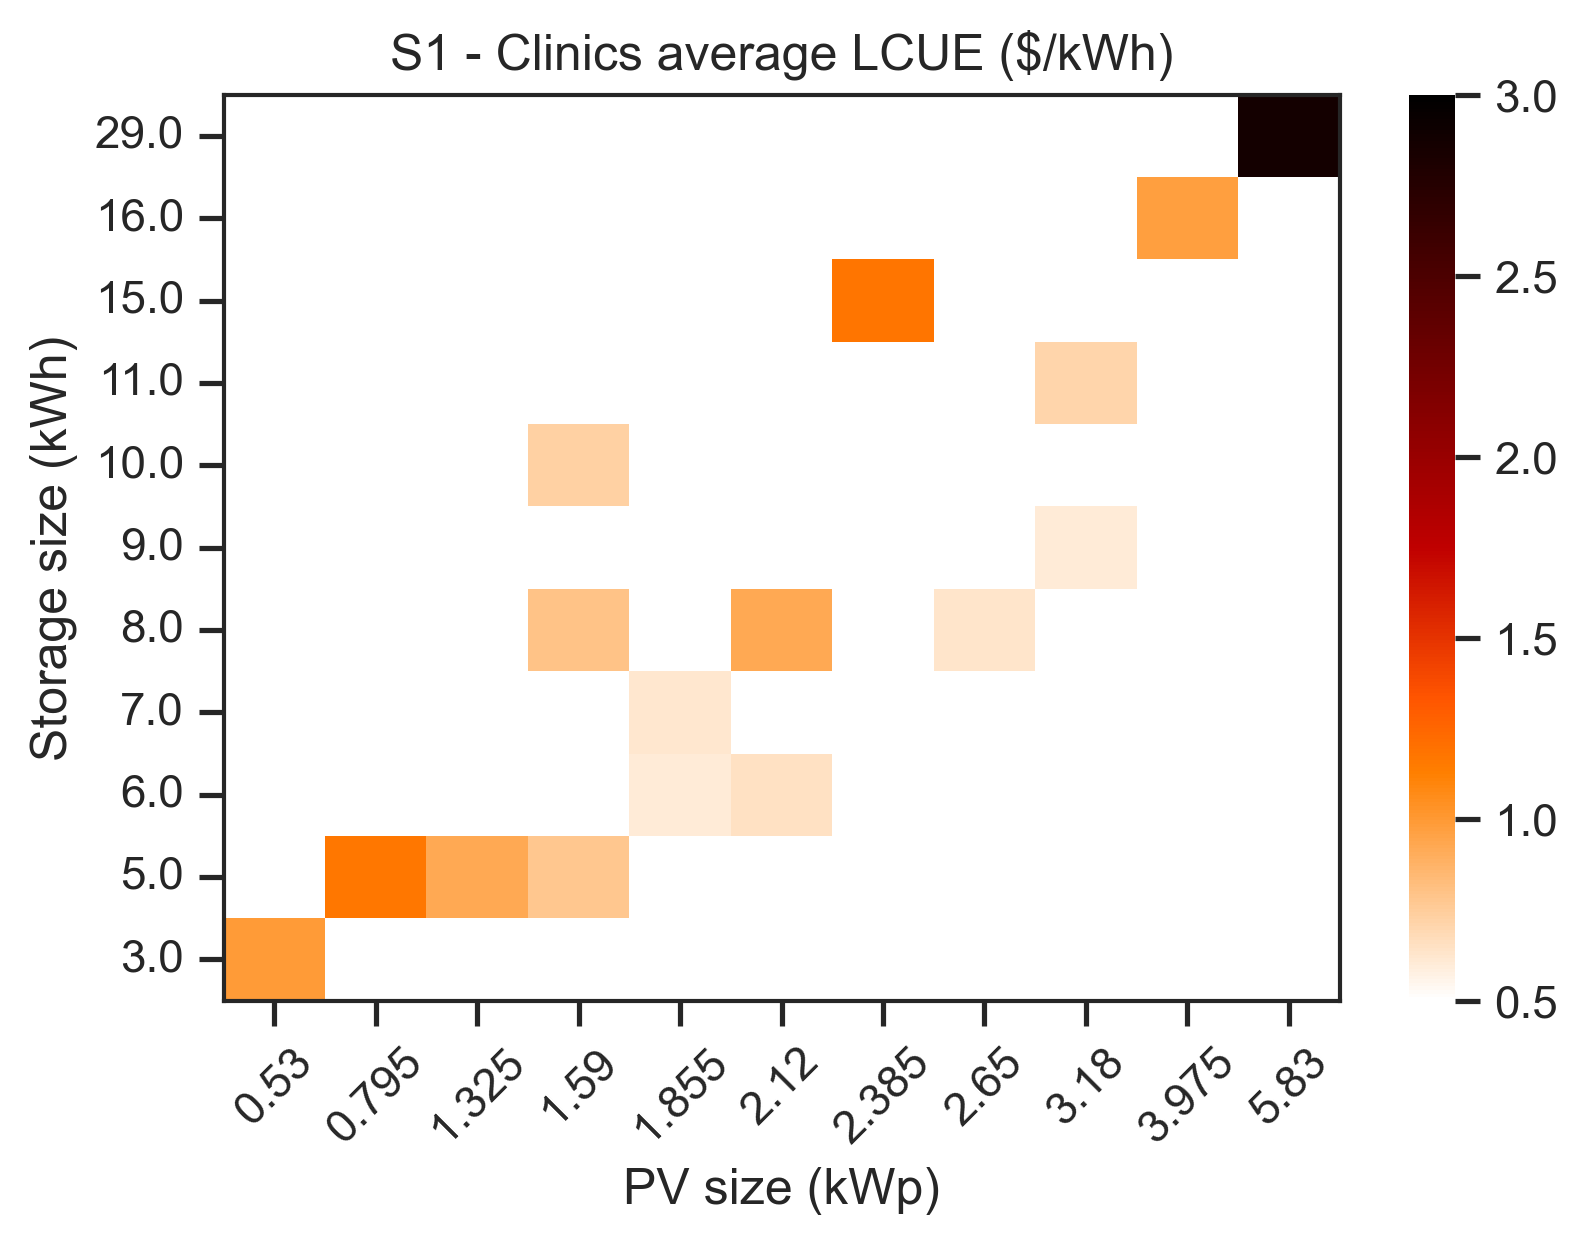

In [12]:
# S1 CLINIC LCUE PLOT (without annotations)
ax = sns.heatmap(lcue_clinics_s1_hp, vmin=0.5, vmax=3, cmap="gist_heat_r") # fmt=".3g" also works
ax.invert_yaxis()
ax.set_title("S1 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# ax.plot(8.5,9.5, marker="D", color= "black", ms="5")  # or "black", "dimgrey"

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
# plt.tight_layout()
plt.show()

In [13]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s2 = s2[s2.Institution != 'School']
# to check there are 18 clinics
clinics_s2["Site_name"].count()

18

In [16]:
clinics_s2["LCUE"].describe().round(2)  # to know LCUE values (all clinics)

count    18.00
mean      0.75
std       0.46
min       0.41
25%       0.53
50%       0.63
75%       0.80
max       2.47
Name: LCUE, dtype: float64

In [17]:
clinics_s2 # to show in Jupyter

Site_name        County  Initial_PV_size  \
13                   Boyani_Dispensary        Kilifi            1.325   
16                     Busa_Dispensary         Kwale            1.590   
18              Chingombero_Dispensary         Kwale            1.325   
21             Dadacha_Basa_Dispensary        Isiolo            1.855   
39   Isiolo_Samburu_Complex_Dispensary        Isiolo            1.590   
54                Kavunyalo_Dispensary        Kilifi            1.855   
78                Mabesheni_Dispensary         Kwale            1.325   
86                 Makamini_Dispensary         Kwale            0.795   
98                   Mazola_Dispensary         Kwale            1.060   
102                  Mbulia_Dispensary  Taita_Taveta            0.530   
106        Mgange_Dawida_Health_centre  Taita_Taveta            2.120   
107         Mgange_Nyika_health_centre  Taita_Taveta            3.710   
120                  Mtumwa_Dispensary         Kwale            1.855   
133             Mwembe_Kati_Dispensary        Kilifi            1.590   
147              Sagalla_Health_Centre  Taita_Taveta            2.915   
148               Saghaighu_dispensary  Taita_Taveta            1.855   
151               Shakahola_Dispensary        Kilifi            1.590   
162            Werugha_Health_facility  Taita_Taveta            2.650   

     Initial_storage_size  Final_PV_size  Final_storage_size   LCUE  \
13                    3.0          1.126               2.633  0.470   
16                    5.0          1.352               4.648  0.654   
18                    3.0          1.126               2.776  0.646   
21                    5.0          1.577               4.500  0.410   
39                    6.0          1.352               5.707  0.772   
54                    5.0          1.577               4.426  0.459   
78                    5.0          1.126               4.528  0.485   
86                    2.0          0.676               1.855  0.870   
98                    3.0          0.901               2.760  0.747   
102                   2.0          0.450               1.819  0.890   
106                  13.0          1.802              12.660  1.070   
107                  26.0          3.154              25.692  2.468   
120                   6.0          1.577               5.472  0.543   
133                   4.0          1.352               3.666  0.526   
147                  13.0          2.478              12.400  0.816   
148                   5.0          1.577               4.662  0.556   
151                   5.0          1.352               4.541  0.527   
162                   9.0          2.253               8.402  0.621   

     Emissions_intensity  Cumulative_system_cost  Cumulative_system_GHG  \
13               186.794                3964.432               2804.775   
16               258.554                4905.762               3445.330   
18               266.837                4322.062               3176.775   
21               175.306                5097.092               3865.885   
39               303.232                5638.392               3927.330   
54               195.600                5097.092               3865.885   
78               174.523                4714.432               3024.775   
86               282.412                3206.772               1853.665   
98               264.019                3773.102               2384.220   
102              237.213                3015.442               1433.110   
106              383.214                8646.052               5538.440   
107              927.531               15384.292              10235.770   
120              233.240                6187.352               4719.885   
133              218.207                4530.762               3335.330   
147              343.789                9577.672               7172.105   
148              238.243                5097.092               3865.885   
151             

In [15]:
# LCUE:
# Groups clinics by Initial storage and PV size and calculates average LCUE in that bin
lcue_clinics_s2 = clinics_s2.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_clinics_s2 = lcue_clinics_s2.to_frame()
lcue_clinics_s2 # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size        
2.0                  0.530            0.8900
                     0.795            0.8700
3.0                  1.060            0.7470
                     1.325            0.5580
4.0                  1.590            0.5260
5.0                  1.325            0.4850
                     1.590            0.5905
                     1.855            0.4750
6.0                  1.590            0.7720
                     1.855            0.5430
9.0                  2.650            0.6210
13.0                 2.120            1.0700
                     2.915            0.8160
26.0                 3.710            2.4680

In [18]:
# to know clinics min and max average LCUE values (vmin & vmax)
lcue_clinics_s2["LCUE"].describe().round(3)
                    # returns: min= 0.475 (vmin), max= 2.468 (vmax)
                    # returns count != than 18 because some sites have same size

count    14.000
mean      0.817
std       0.508
min       0.475
25%       0.547
50%       0.684
75%       0.856
max       2.468
Name: LCUE, dtype: float64

In [19]:
# Pivot df to be able to do heatmap
lcue_clinics_s2_hp = lcue_clinics_s2.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_clinics_s2_hp # to show in Jupyter

Initial_PV_size       0.530  0.795  1.060  1.325   1.590  1.855  2.120  2.650  \
Initial_storage_size                                                            
2.0                    0.89   0.87    NaN    NaN     NaN    NaN    NaN    NaN   
3.0                     NaN    NaN  0.747  0.558     NaN    NaN    NaN    NaN   
4.0                     NaN    NaN    NaN    NaN  0.5260    NaN    NaN    NaN   
5.0                     NaN    NaN    NaN  0.485  0.5905  0.475    NaN    NaN   
6.0                     NaN    NaN    NaN    NaN  0.7720  0.543    NaN    NaN   
9.0                     NaN    NaN    NaN    NaN     NaN    NaN    NaN  0.621   
13.0                    NaN    NaN    NaN    NaN     NaN    NaN   1.07    NaN   
26.0                    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   

Initial_PV_size       2.915  3.710  
Initial_storage_size                
2.0                     NaN    NaN  
3.0                     NaN    NaN  
4.0                     NaN    NaN  
5.0                     NaN    NaN  
6.0                     NaN    NaN  
9.0                     NaN    NaN  
13.0                  0.816    NaN  
26.0                    NaN  2.468

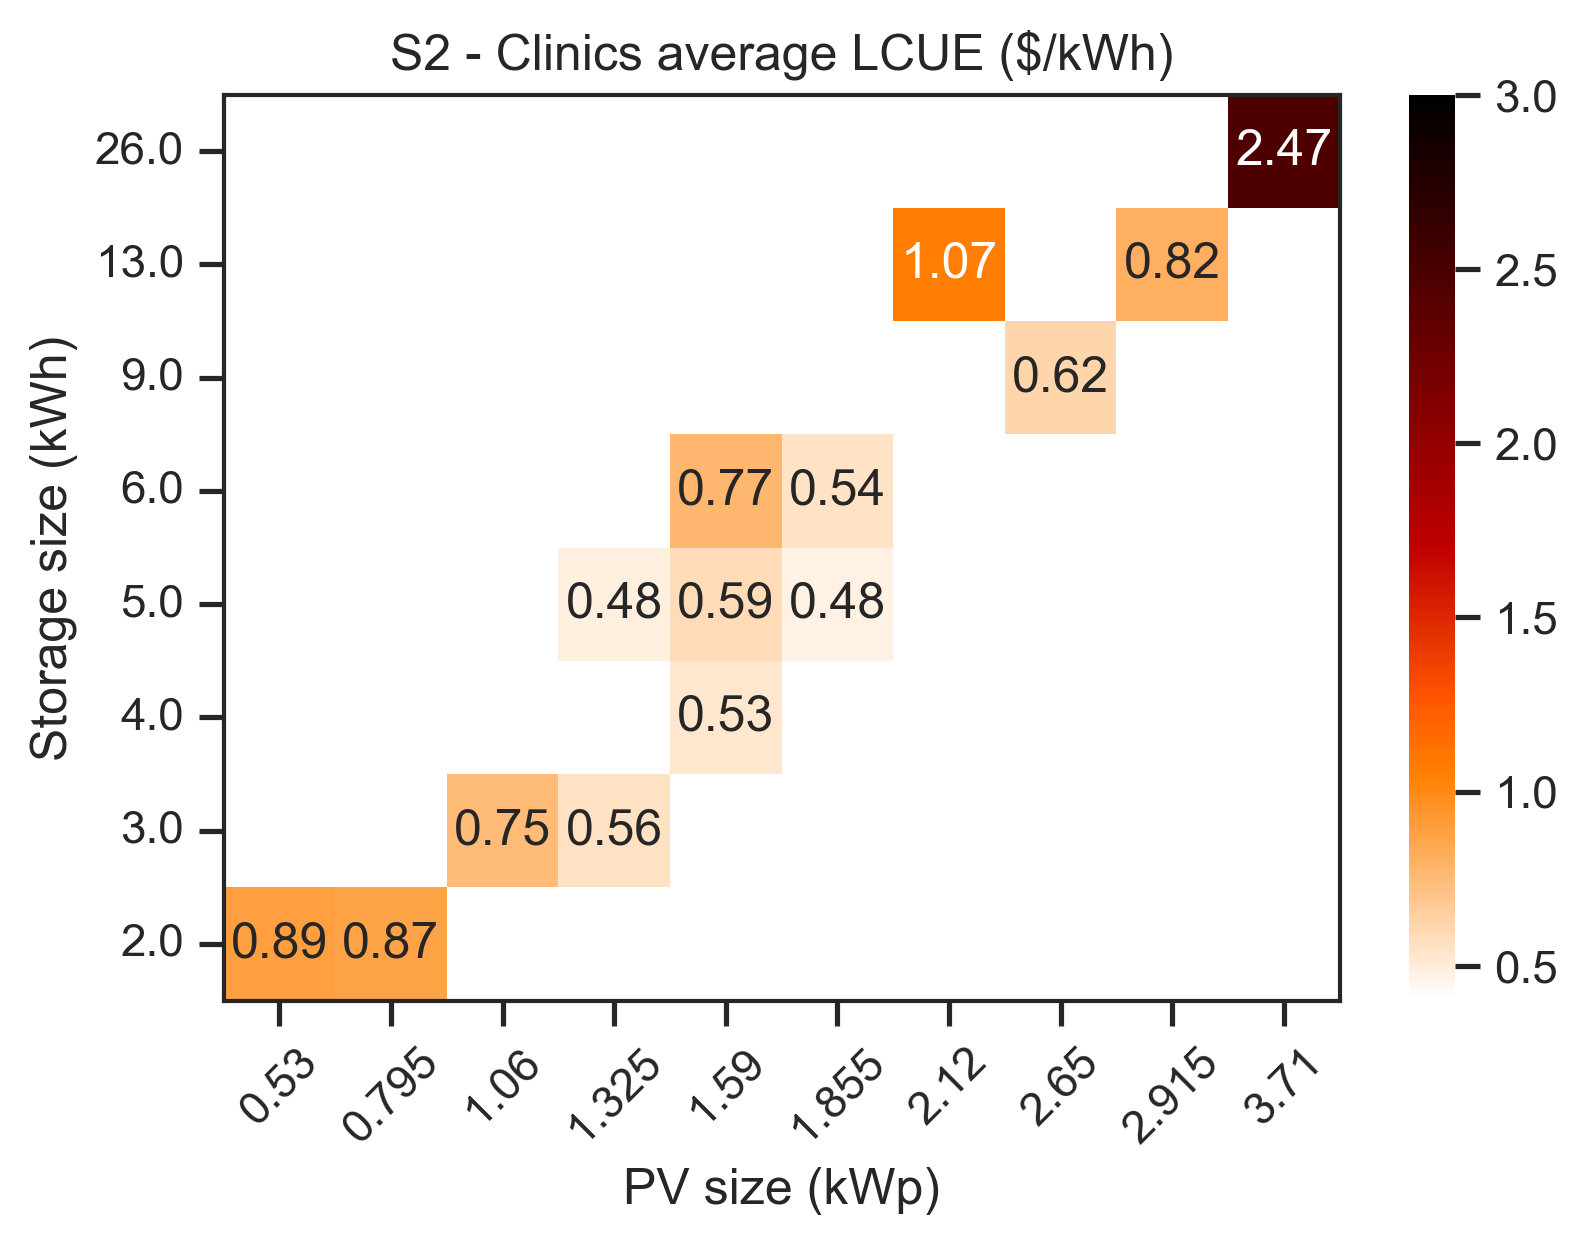

In [20]:
# S2 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_clinics_s2_hp, vmin=0.4, vmax=3, cmap="gist_heat_r", annot=True, fmt=".2f") #
ax.invert_yaxis()
ax.set_title("S2 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

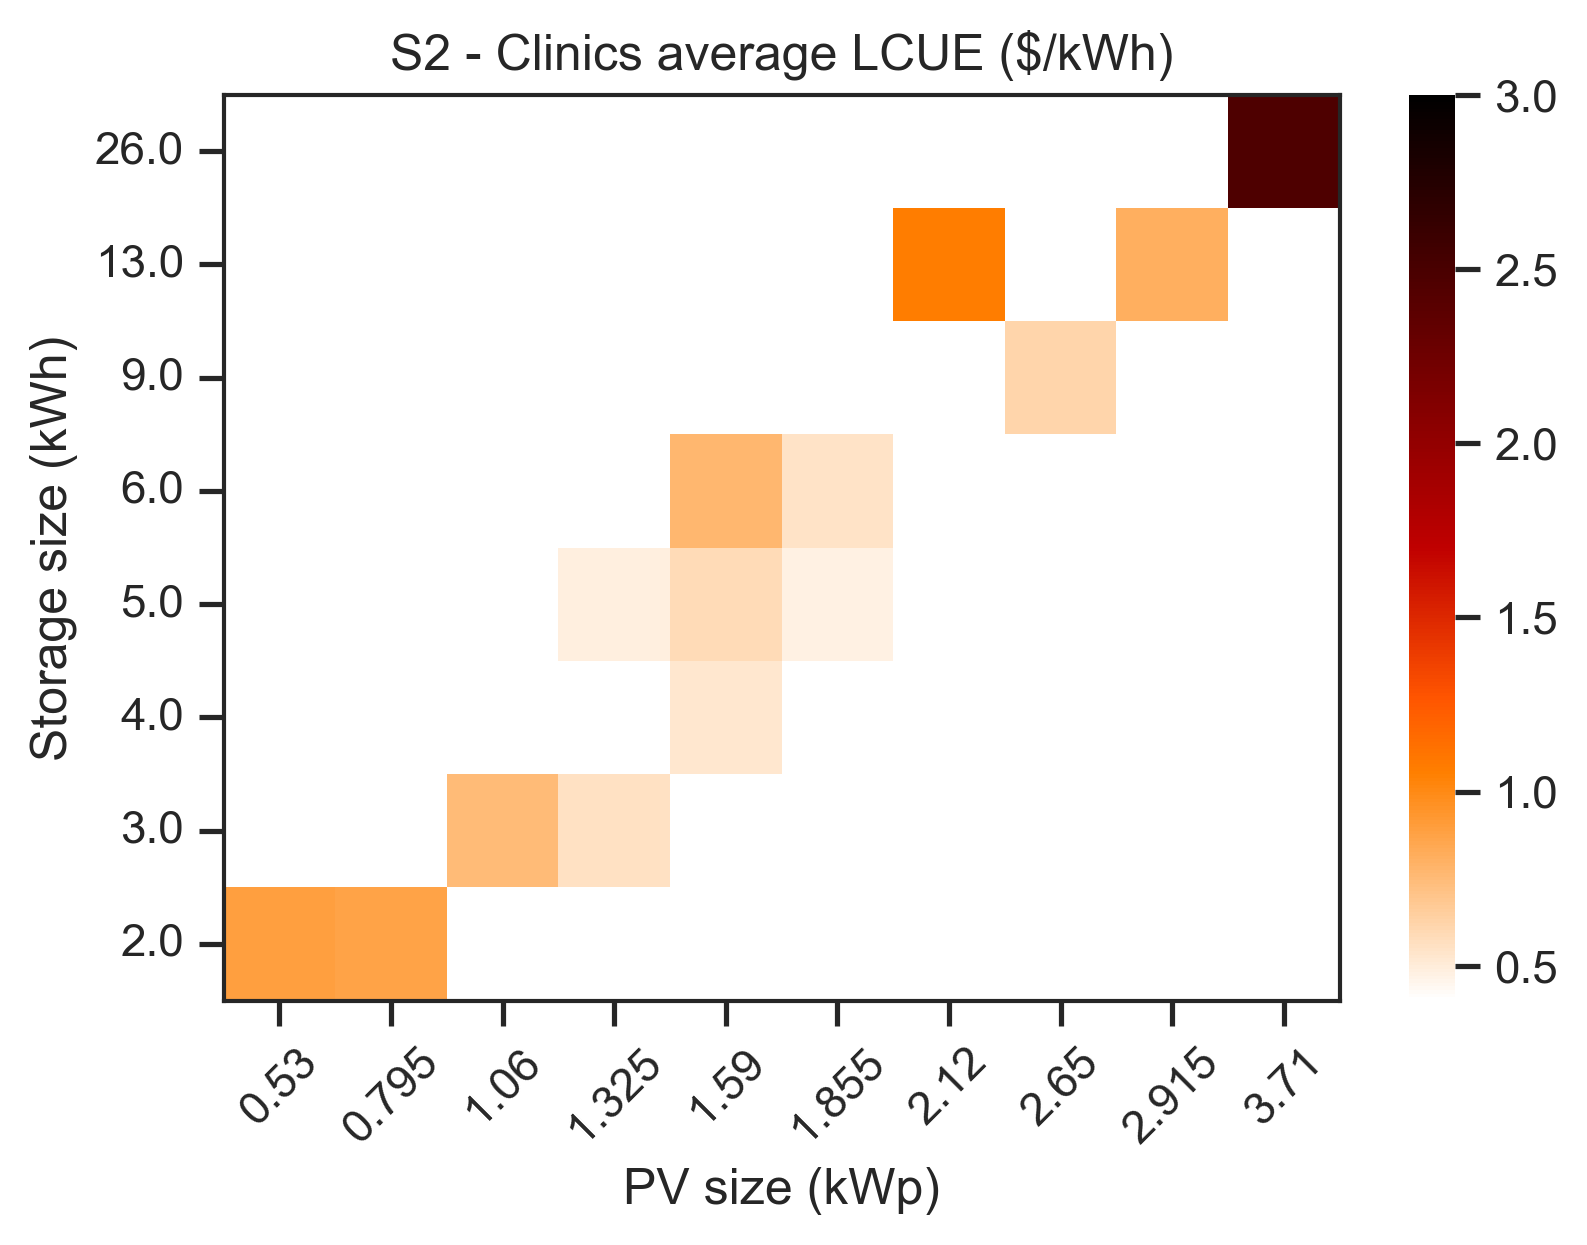

In [21]:
# S2 CLINIC SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(lcue_clinics_s2_hp, vmin=0.4, vmax=3, cmap="gist_heat_r")
ax.invert_yaxis()
ax.set_title("S2 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [22]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s3 = s3[s3.Institution != 'School']

# to check there are 18 clinics
clinics_s3["Site_name"].count()  # returns 18

18

In [23]:
clinics_s3["LCUE"].describe().round(2)  # to know LCUE values (all clinics)

count    18.00
mean      0.66
std       0.37
min       0.36
25%       0.45
50%       0.56
75%       0.72
max       2.00
Name: LCUE, dtype: float64

In [24]:
clinics_s3 # to show in Jupyter df of Clinics in Scenario 3

Site_name        County  Initial_PV_size  \
13                   Boyani_Dispensary        Kilifi            0.795   
16                     Busa_Dispensary         Kwale            1.060   
18              Chingombero_Dispensary         Kwale            1.060   
21             Dadacha_Basa_Dispensary        Isiolo            1.325   
39   Isiolo_Samburu_Complex_Dispensary        Isiolo            1.325   
54                Kavunyalo_Dispensary        Kilifi            1.590   
78                Mabesheni_Dispensary         Kwale            1.060   
86                 Makamini_Dispensary         Kwale            0.530   
98                   Mazola_Dispensary         Kwale            0.530   
102                  Mbulia_Dispensary  Taita_Taveta            0.530   
106        Mgange_Dawida_Health_centre  Taita_Taveta            1.590   
107         Mgange_Nyika_health_centre  Taita_Taveta            3.180   
120                  Mtumwa_Dispensary         Kwale            1.325   
133             Mwembe_Kati_Dispensary        Kilifi            1.060   
147              Sagalla_Health_Centre  Taita_Taveta            2.650   
148               Saghaighu_dispensary  Taita_Taveta            1.590   
151               Shakahola_Dispensary        Kilifi            1.060   
162            Werugha_Health_facility  Taita_Taveta            2.385   

     Initial_storage_size  Final_PV_size  Final_storage_size   LCUE  \
13                    3.0          0.676               2.641  0.434   
16                    4.0          0.901               3.659  0.567   
18                    2.0          0.901               1.786  0.577   
21                    4.0          1.126               3.520  0.361   
39                    4.0          1.126               3.718  0.663   
54                    4.0          1.352               3.450  0.420   
78                    4.0          0.901               3.549  0.441   
86                    1.0          0.450               0.862  0.743   
98                    3.0          0.450               2.766  0.690   
102                   2.0          0.450               1.819  0.890   
106                  11.0          1.352              10.671  0.963   
107                  18.0          2.703              17.705  2.005   
120                   5.0          1.126               4.492  0.493   
133                   3.0          0.901               2.680  0.453   
147                  10.0          2.253               9.432  0.732   
148                   3.0          1.352               2.686  0.472   
151                   4.0          0.901               3.556  0.458   
162                   7.0          2.027               6.430  0.562   

     Emissions_intensity  Cumulative_system_cost  Cumulative_system_GHG  \
13               133.966                3581.772               1963.665   
16               192.212                4148.102               2494.220   
18               228.708                3755.732               2646.220   
21               136.937                4339.432               2914.775   
39               261.679                4697.062               3286.775   
54               174.530                4530.762               3335.330   
78               149.125                4148.102               2494.220   
86               209.738                2640.442               1323.110   
98               176.311                3390.442               1543.110   
102              237.213                3015.442               1433.110   
106              321.263                7513.392               4477.330   
107              804.086               12001.632               8514.660   
120              192.997                5429.692               3768.775   
133              161.861                3773.102               2384.220   
147              320.807                8261.342               6421.550   
148              207.300                4155.762               3225.330   
151             

In [25]:
# LCUE:
# Groups clinics by Initial storage and PV size and calculates average LCUE in that bin
lcue_clinics_s3 = clinics_s3.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_clinics_s3 = lcue_clinics_s3.to_frame()
lcue_clinics_s3 # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size          
1.0                  0.530            0.743000
2.0                  0.530            0.890000
                     1.060            0.577000
3.0                  0.530            0.690000
                     0.795            0.434000
                     1.060            0.453000
                     1.590            0.472000
4.0                  1.060            0.488667
                     1.325            0.512000
                     1.590            0.420000
5.0                  1.325            0.493000
7.0                  2.385            0.562000
10.0                 2.650            0.732000
11.0                 1.590            0.963000
18.0                 3.180            2.005000

In [26]:
lcue_clinics_s3.round(2)

LCUE
Initial_storage_size Initial_PV_size      
1.0                  0.530            0.74
2.0                  0.530            0.89
                     1.060            0.58
3.0                  0.530            0.69
                     0.795            0.43
                     1.060            0.45
                     1.590            0.47
4.0                  1.060            0.49
                     1.325            0.51
                     1.590            0.42
5.0                  1.325            0.49
7.0                  2.385            0.56
10.0                 2.650            0.73
11.0                 1.590            0.96
18.0                 3.180            2.00

In [27]:
# to know clinics min and max average LCUE values (vmin & vmax)
lcue_clinics_s3["LCUE"].describe().round(3)
                    # returns: min=0.42  (vmin), max= 2.005 (vmax)
                    # returns count != than 18 because some sites have same size

count    15.000
mean      0.696
std       0.399
min       0.420
25%       0.480
50%       0.562
75%       0.738
max       2.005
Name: LCUE, dtype: float64

In [28]:
# Pivot df to be able to do heatmap
lcue_clinics_s3_hp = lcue_clinics_s3.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_clinics_s3_hp.round(3) # to show in Jupyter

Initial_PV_size       0.530  0.795  1.060  1.325  1.590  2.385  2.650  3.180
Initial_storage_size                                                        
1.0                   0.743    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2.0                   0.890    NaN  0.577    NaN    NaN    NaN    NaN    NaN
3.0                   0.690  0.434  0.453    NaN  0.472    NaN    NaN    NaN
4.0                     NaN    NaN  0.489  0.512  0.420    NaN    NaN    NaN
5.0                     NaN    NaN    NaN  0.493    NaN    NaN    NaN    NaN
7.0                     NaN    NaN    NaN    NaN    NaN  0.562    NaN    NaN
10.0                    NaN    NaN    NaN    NaN    NaN    NaN  0.732    NaN
11.0                    NaN    NaN    NaN    NaN  0.963    NaN    NaN    NaN
18.0                    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.005

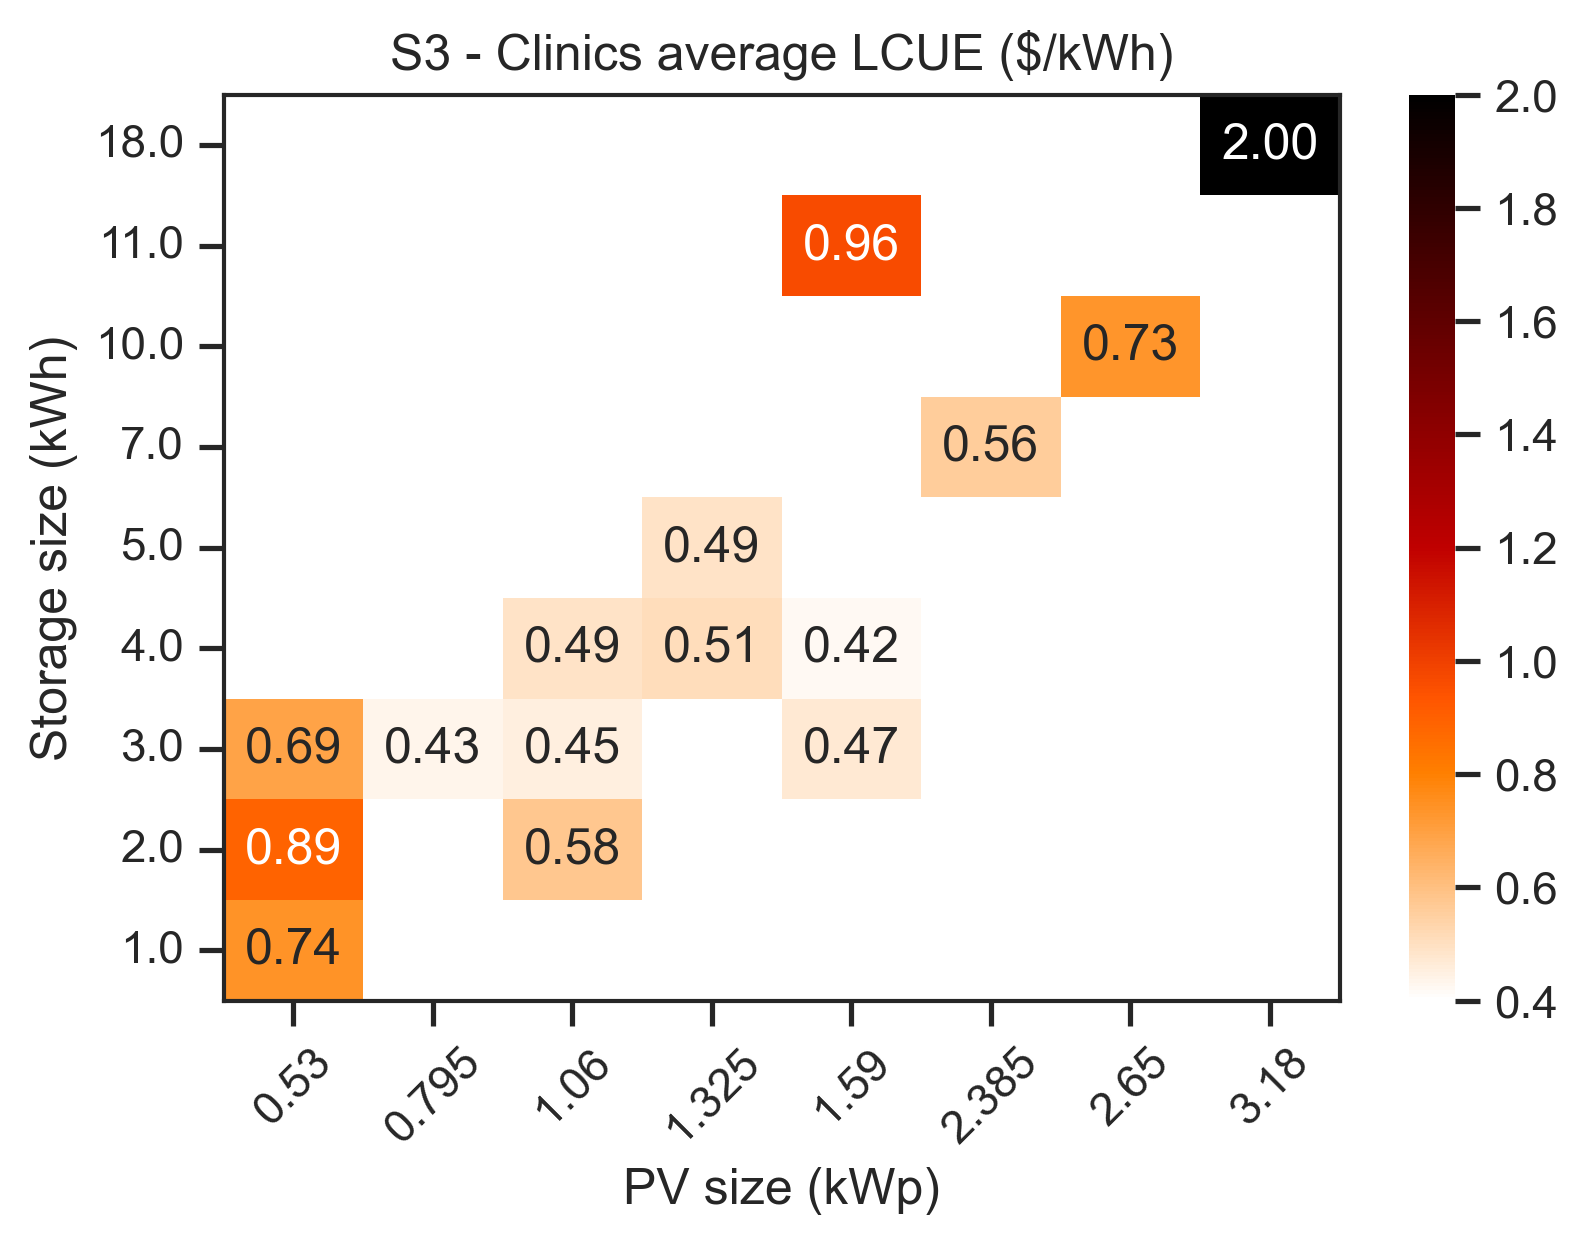

In [29]:
# S3 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_clinics_s3_hp, vmin=0.4, vmax=2, cmap="gist_heat_r", annot=True, fmt=".2f") 
ax.invert_yaxis()
ax.set_title("S3 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

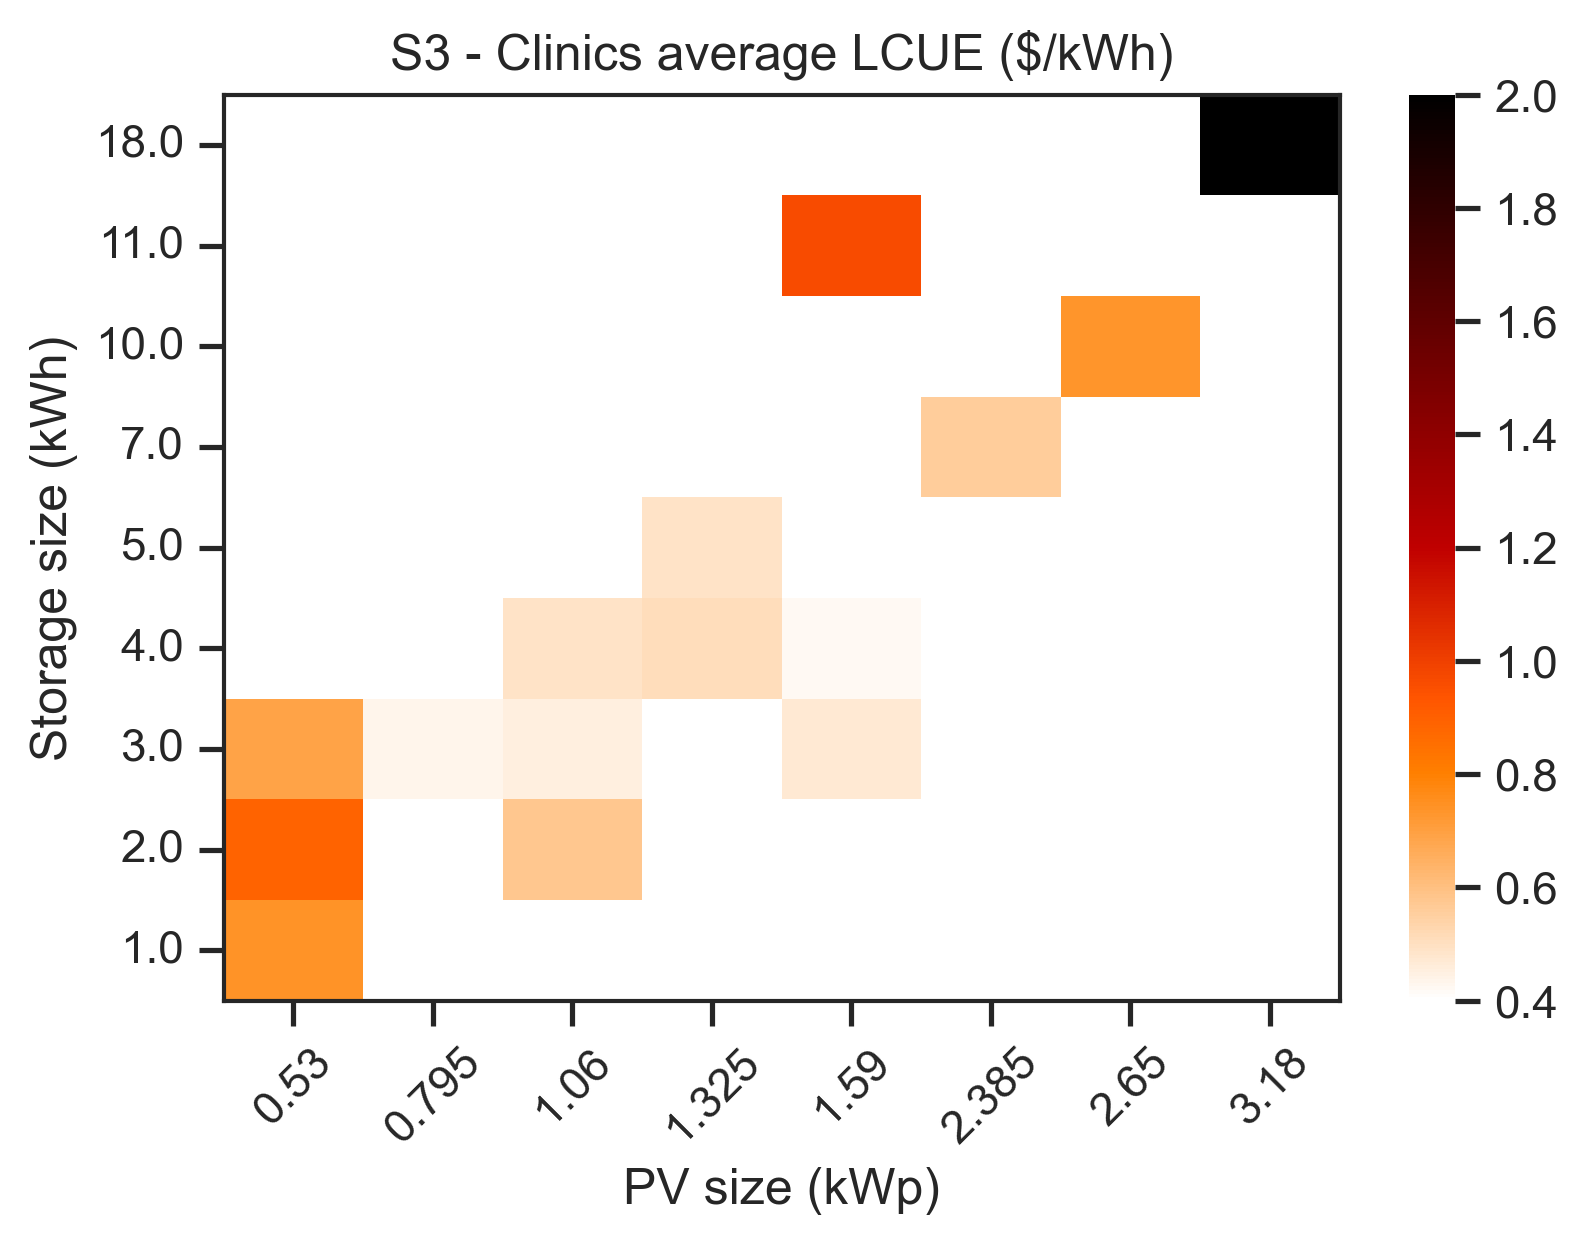

In [30]:
# S3 CLINIC SIZES PLOT (Plotting data as it is - without annotations)
ax = sns.heatmap(lcue_clinics_s3_hp, vmin=0.4, vmax=2, cmap="gist_heat_r") 
ax.invert_yaxis()
ax.set_title("S3 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [31]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF CLINICS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of clinics only
clinics_s4 = s4[s4.Institution != 'School']

# to check there are 18 clinics
clinics_s4["Site_name"].count()  # returns 18

18

In [32]:
clinics_s4["LCUE"].describe().round(2)  # to know LCUE values (all clinics)

count    18.00
mean      0.63
std       0.33
min       0.36
25%       0.44
50%       0.53
75%       0.68
max       1.81
Name: LCUE, dtype: float64

In [33]:
clinics_s4 # to show in Jupyter

Site_name        County  Initial_PV_size  \
13                   Boyani_Dispensary        Kilifi            0.795   
16                     Busa_Dispensary         Kwale            0.795   
18              Chingombero_Dispensary         Kwale            0.795   
21             Dadacha_Basa_Dispensary        Isiolo            1.325   
39   Isiolo_Samburu_Complex_Dispensary        Isiolo            1.060   
54                Kavunyalo_Dispensary        Kilifi            1.060   
78                Mabesheni_Dispensary         Kwale            1.060   
86                 Makamini_Dispensary         Kwale            0.530   
98                   Mazola_Dispensary         Kwale            0.530   
102                  Mbulia_Dispensary  Taita_Taveta            0.265   
106        Mgange_Dawida_Health_centre  Taita_Taveta            1.325   
107         Mgange_Nyika_health_centre  Taita_Taveta            2.915   
120                  Mtumwa_Dispensary         Kwale            1.325   
133             Mwembe_Kati_Dispensary        Kilifi            1.060   
147              Sagalla_Health_Centre  Taita_Taveta            2.120   
148               Saghaighu_dispensary  Taita_Taveta            1.060   
151               Shakahola_Dispensary        Kilifi            1.060   
162            Werugha_Health_facility  Taita_Taveta            2.120   

     Initial_storage_size  Final_PV_size  Final_storage_size   LCUE  \
13                    3.0          0.676               2.641  0.434   
16                    3.0          0.676               2.685  0.519   
18                    2.0          0.676               1.791  0.564   
21                    4.0          1.126               3.520  0.361   
39                    3.0          0.901               2.740  0.616   
54                    4.0          0.901               3.469  0.397   
78                    4.0          0.901               3.549  0.441   
86                    1.0          0.450               0.862  0.743   
98                    2.0          0.450               1.780  0.639   
102                   2.0          0.225               1.831  0.880   
106                   9.0          1.126               8.695  0.894   
107                  14.0          2.478              13.723  1.808   
120                   4.0          1.126               3.515  0.472   
133                   3.0          0.901               2.680  0.453   
147                   9.0          1.802               8.468  0.700   
148                   3.0          0.901               2.700  0.447   
151                   3.0          0.901               2.594  0.441   
162                   6.0          1.802               5.469  0.539   

     Emissions_intensity  Cumulative_system_cost  Cumulative_system_GHG  \
13               133.966                3581.772               1963.665   
16               160.489                3581.772               1963.665   
18               198.233                3564.402               2225.665   
21               136.937                4339.432               2914.775   
39               231.995                4130.732               2756.220   
54               135.210                4148.102               2494.220   
78               149.125                4148.102               2494.220   
86               209.738                2640.442               1323.110   
98               170.629                3015.442               1433.110   
102              178.291                2824.112               1012.555   
106              292.541                6572.062               3836.775   
107              759.693               10310.302               7654.105   
120              192.966                5054.692               3658.775   
133              161.861                3773.102               2384.220   
147              288.424                7503.682               5470.440   
148              160.096                3773.102               2384.220   
151             

In [34]:
# LCUE:
# Groups clinics by Initial storage and PV size and calculates average LCUE in that bin
lcue_clinics_s4 = clinics_s4.groupby(["Initial_storage_size","Initial_PV_size"])["LCUE"].mean()

# Convert series to df
lcue_clinics_s4 = lcue_clinics_s4.to_frame()
lcue_clinics_s4.round(3) # to show in Jupyter

LCUE
Initial_storage_size Initial_PV_size       
1.0                  0.530            0.743
2.0                  0.265            0.880
                     0.530            0.639
                     0.795            0.564
3.0                  0.795            0.477
                     1.060            0.489
4.0                  1.060            0.419
                     1.325            0.416
6.0                  2.120            0.539
9.0                  1.325            0.894
                     2.120            0.700
14.0                 2.915            1.808

In [35]:
# to know clinics min and max average LCUE values (vmin & vmax)
lcue_clinics_s4["LCUE"].describe().round(3)
                    # returns: min=0.416  (vmin), max= 1.808 (vmax)
                    # returns count != than 18 because some sites have same size

count    12.000
mean      0.714
std       0.381
min       0.416
25%       0.486
50%       0.601
75%       0.777
max       1.808
Name: LCUE, dtype: float64

In [36]:
# Pivot df to be able to do heatmap
lcue_clinics_s4_hp = lcue_clinics_s4.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="LCUE")
lcue_clinics_s4_hp.round(3) # to show in Jupyter

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  2.120  2.915
Initial_storage_size                                                 
1.0                     NaN  0.743    NaN    NaN    NaN    NaN    NaN
2.0                    0.88  0.639  0.564    NaN    NaN    NaN    NaN
3.0                     NaN    NaN  0.477  0.489    NaN    NaN    NaN
4.0                     NaN    NaN    NaN  0.419  0.416    NaN    NaN
6.0                     NaN    NaN    NaN    NaN    NaN  0.539    NaN
9.0                     NaN    NaN    NaN    NaN  0.894  0.700    NaN
14.0                    NaN    NaN    NaN    NaN    NaN    NaN  1.808

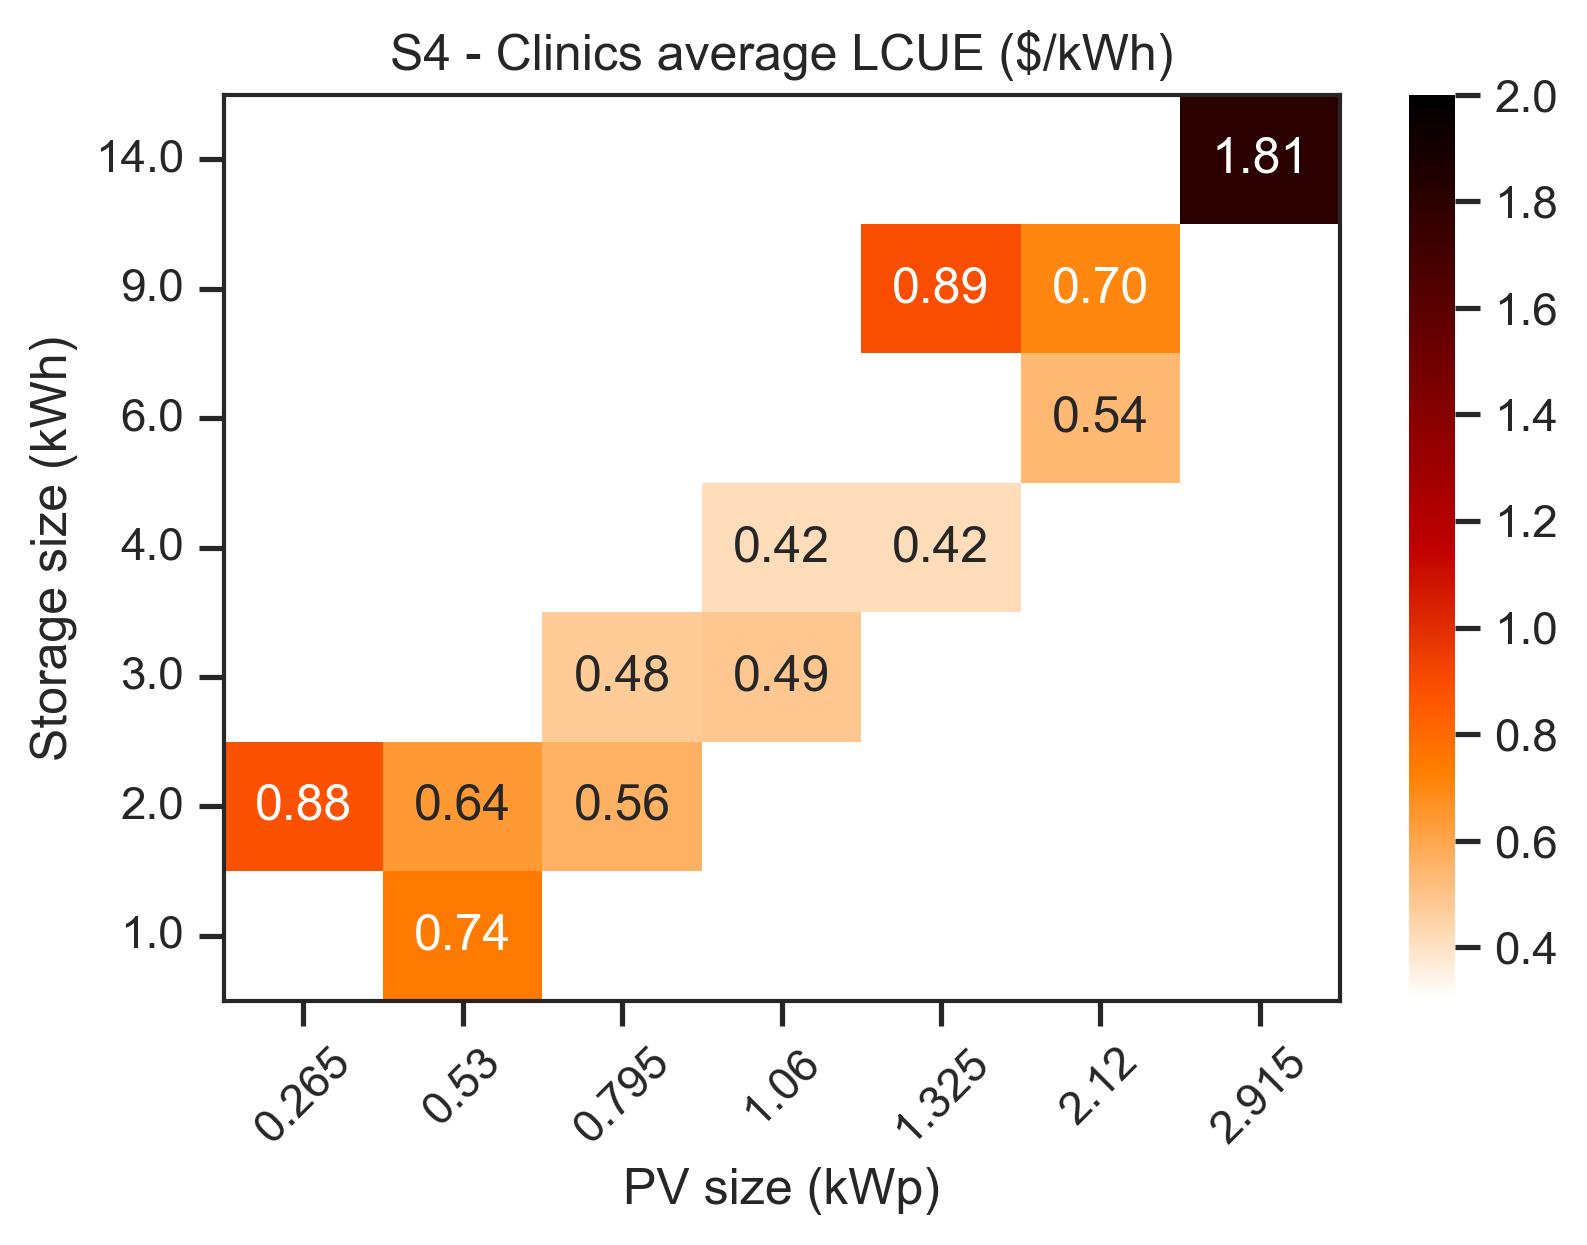

In [37]:
# S4 CLINIC SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(lcue_clinics_s4_hp, vmin=0.3, vmax=2, cmap="gist_heat_r", annot=True, fmt=".2f")  # 
ax.invert_yaxis()
ax.set_title("S4 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

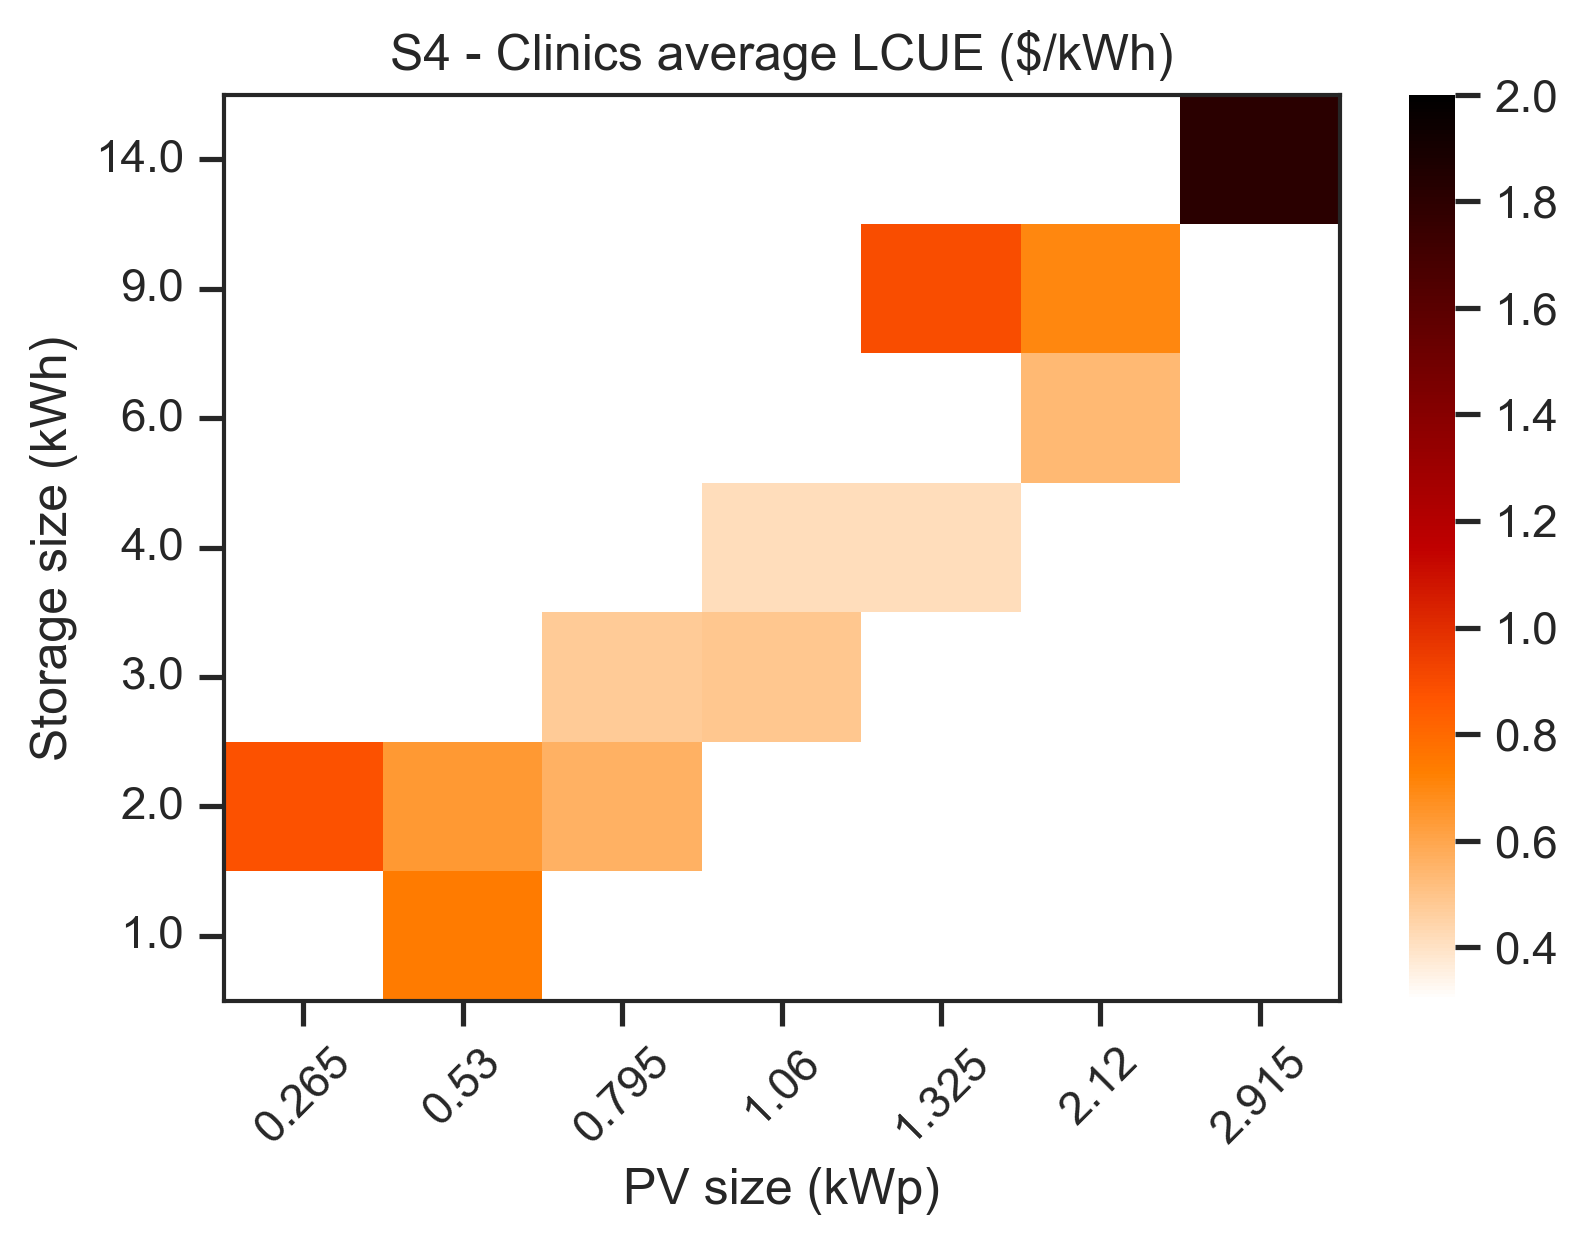

In [38]:
# S4 CLINIC SIZES PLOT (Plotting data as it is - without annotations))
ax = sns.heatmap(lcue_clinics_s4_hp, vmin=0.3, vmax=2, cmap="gist_heat_r")  # 
ax.invert_yaxis()
ax.set_title("S4 - Clinics average LCUE ($/kWh)")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

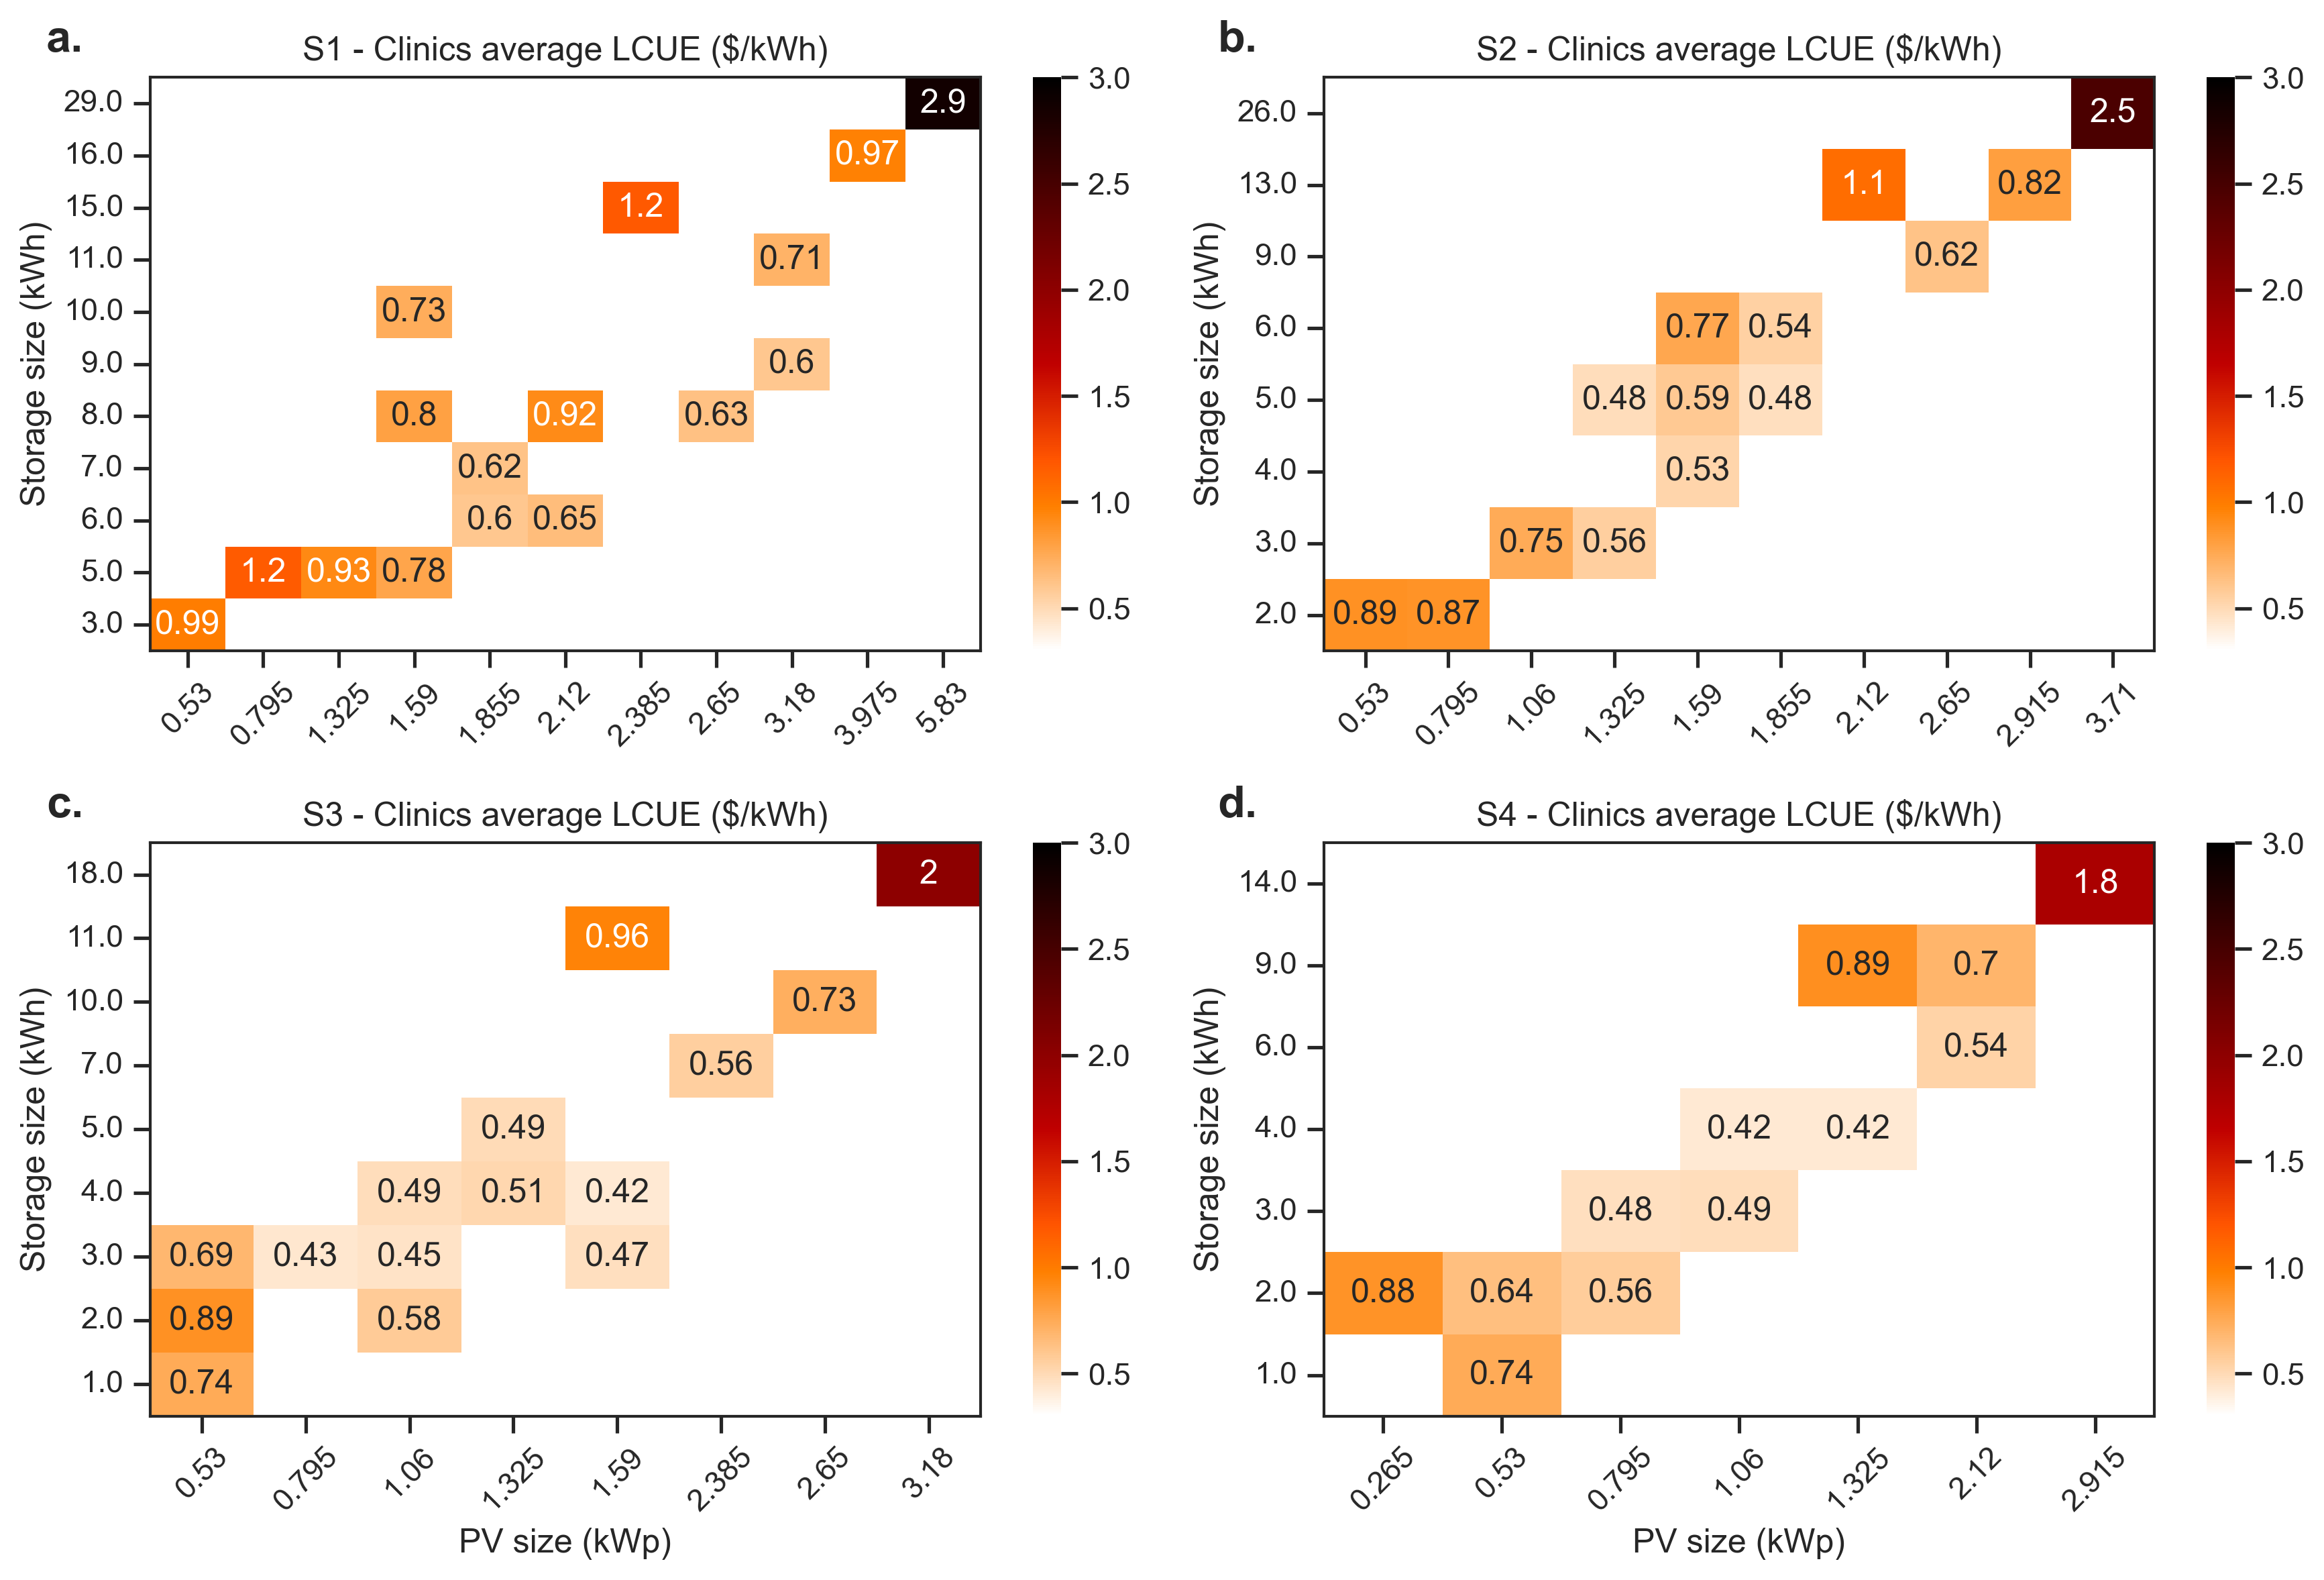

In [40]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., lcue_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_clinics_s1_hp, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_clinics_s2_hp, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_clinics_s3_hp, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_clinics_s4_hp, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

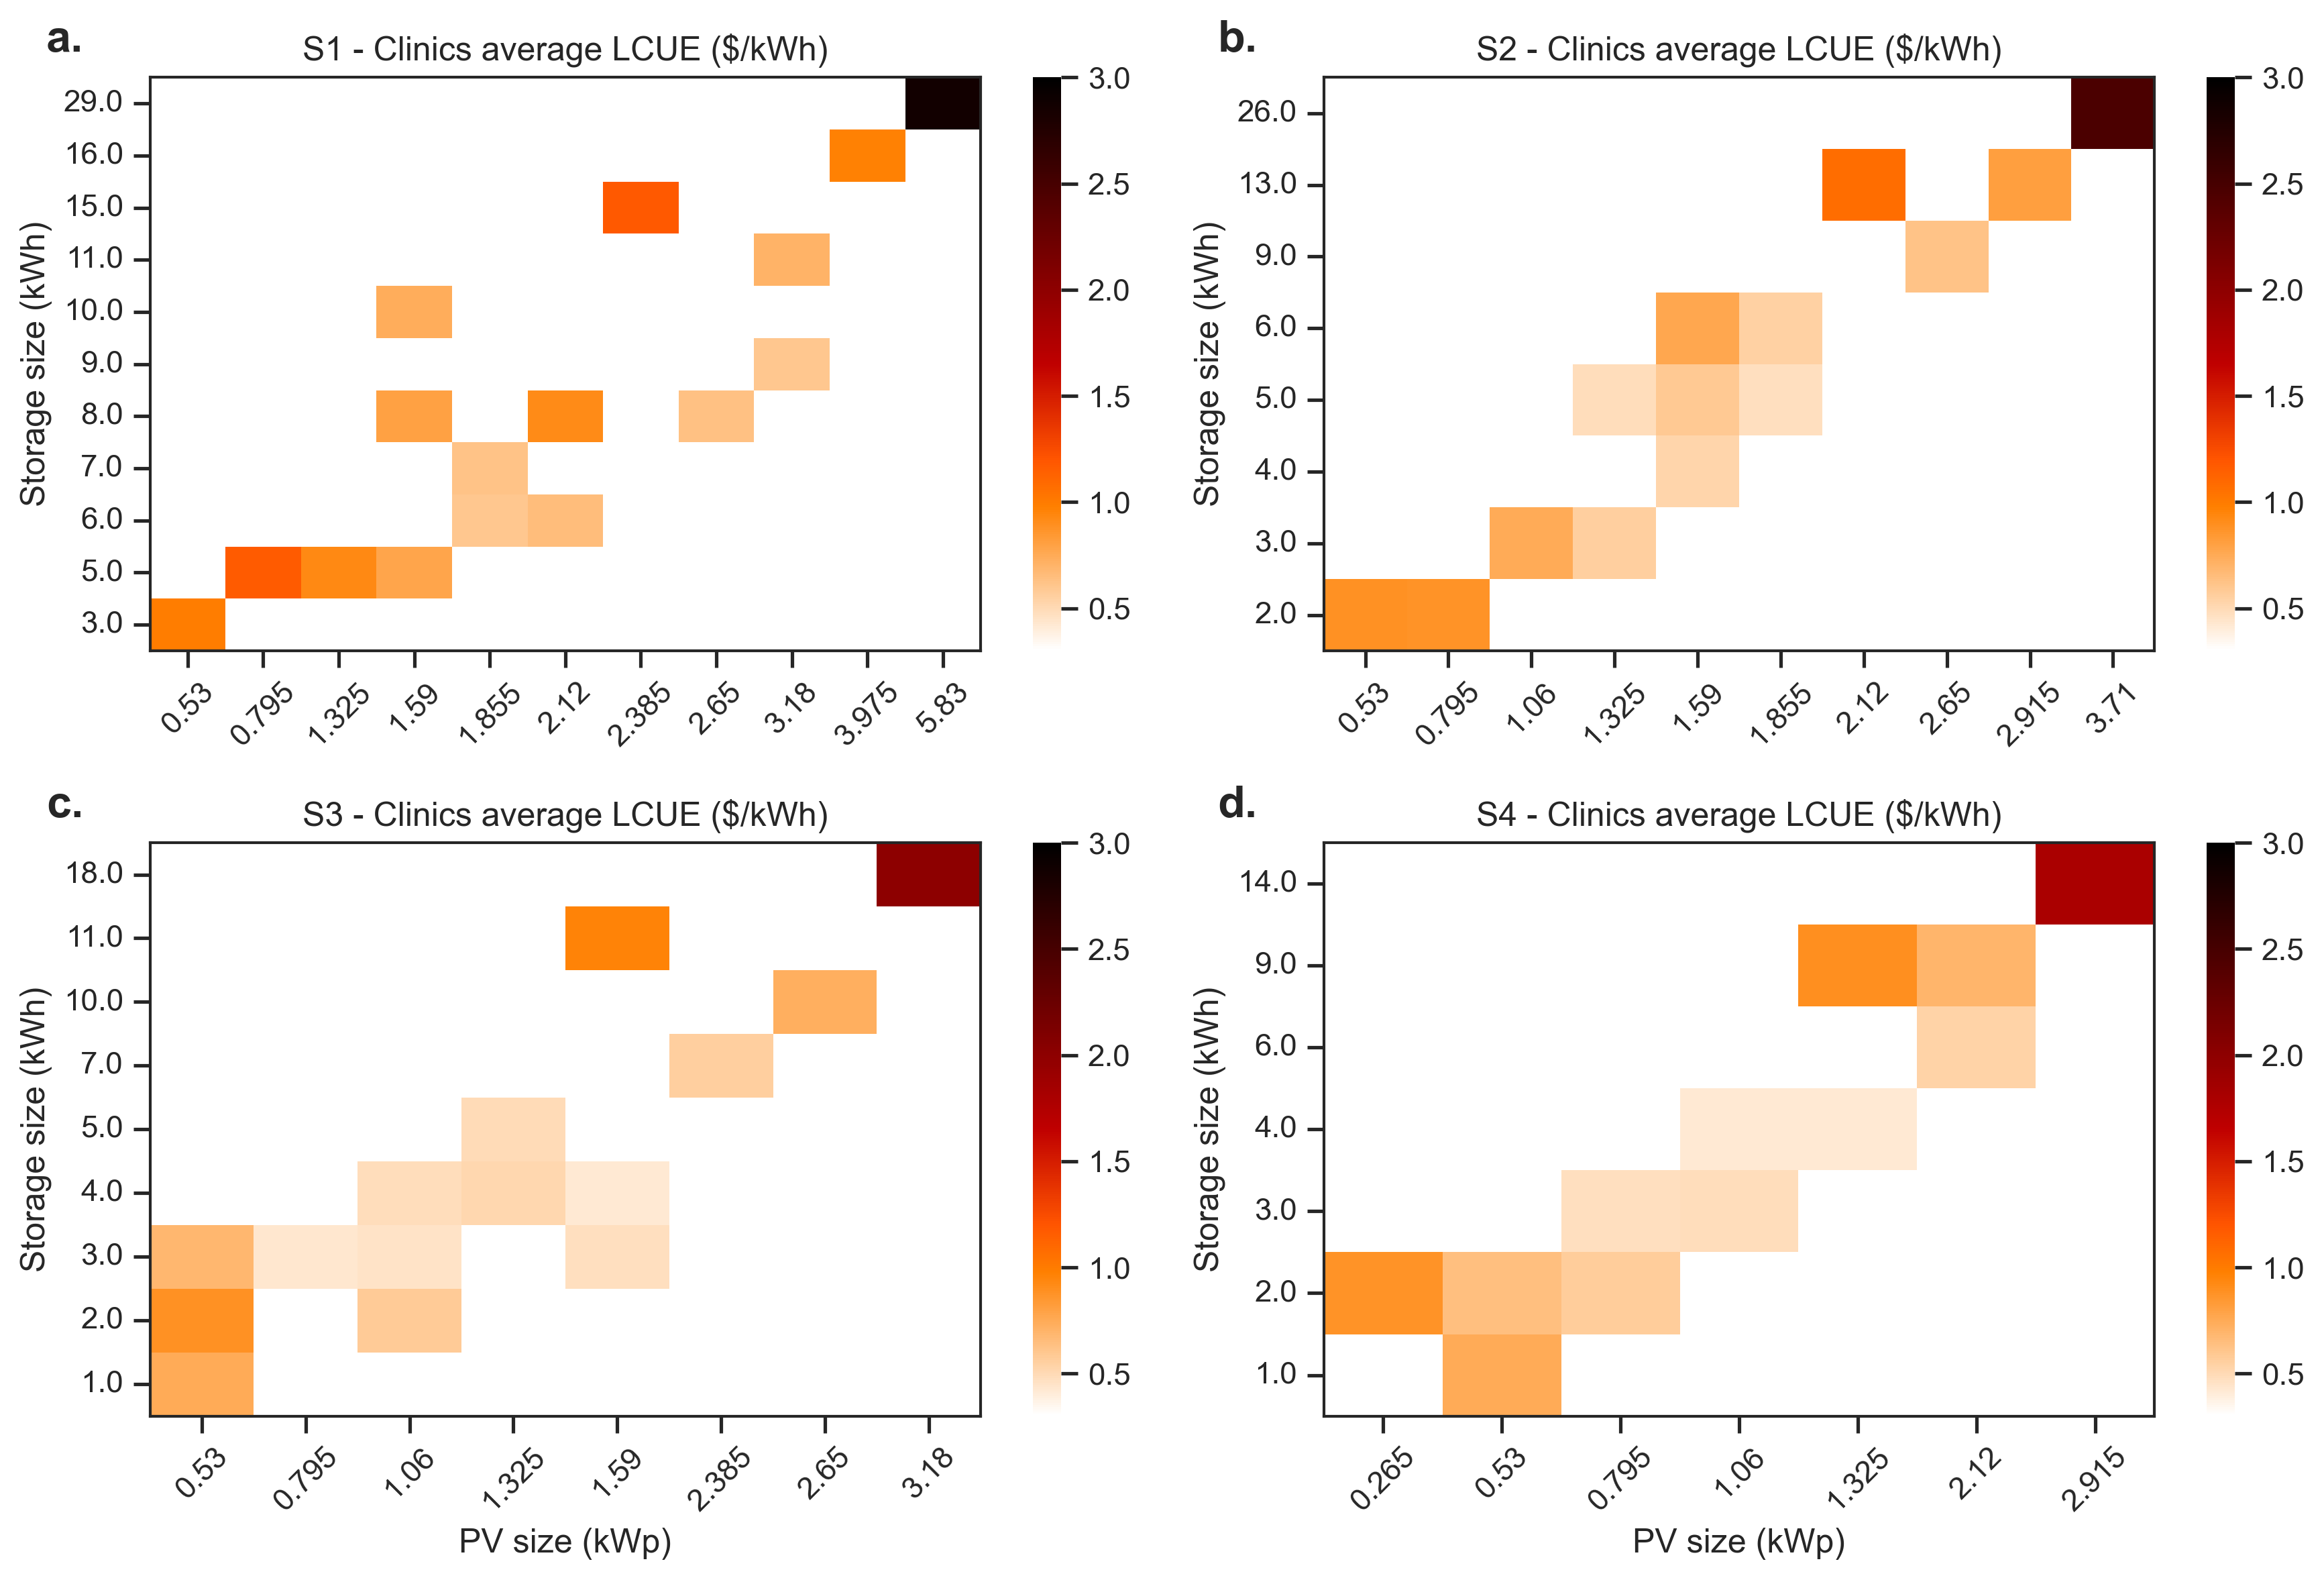

In [41]:
# SAME PLOT AS ABOVE BUT WITHOUT ANNOTATIONS
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., lcue_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_clinics_s1_hp, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_clinics_s2_hp, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_clinics_s3_hp, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_clinics_s4_hp, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [42]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS ACROSS SCENARIOS
# S1
lcue_clinics_s1_hp_ext = lcue_clinics_s1_hp.reindex(range(1,30), axis=0) # fill_value=0
lcue_clinics_s1_hp_ext = lcue_clinics_s1_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S2
lcue_clinics_s2_hp_ext = lcue_clinics_s2_hp.reindex(range(1,30), axis=0) # fill_value=0
lcue_clinics_s2_hp_ext = lcue_clinics_s2_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S3
lcue_clinics_s3_hp_ext = lcue_clinics_s3_hp.reindex(range(1,30), axis=0) # fill_value=0
lcue_clinics_s3_hp_ext = lcue_clinics_s3_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

# S4
lcue_clinics_s4_hp_ext = lcue_clinics_s4_hp.reindex(range(1,30), axis=0) # fill_value=0
lcue_clinics_s4_hp_ext = lcue_clinics_s4_hp_ext.reindex((np.arange(0.265, 6.095, 0.265)).round(3), axis=1)

In [43]:
# To see how it looks like
lcue_clinics_s1_hp_ext.round(2)

Initial_PV_size       0.265  0.530  0.795  1.060  1.325  1.590  1.855  2.120  \
Initial_storage_size                                                           
1                       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                       NaN   0.99    NaN    NaN    NaN    NaN    NaN    NaN   
4                       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5                       NaN    NaN   1.16    NaN   0.93   0.78    NaN    NaN   
6                       NaN    NaN    NaN    NaN    NaN    NaN   0.60   0.65   
7                       NaN    NaN    NaN    NaN    NaN    NaN   0.62    NaN   
8                       NaN    NaN    NaN    NaN    NaN   0.80    NaN   0.92   
9                       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10                      NaN    NaN    NaN    NaN    NaN   0.73    NaN    NaN   
11                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
14                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
16                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
17                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
18                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
22                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
23                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
24                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
26                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
28                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
29                      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Initial_PV_size       2.385  2.650  ...  3.445  3.710  3.975  4.240  4.505  \
Initial_storage_size                ...                                      
1                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
2                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
3                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
4                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
5                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
6                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
7                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
8                       NaN   0.63  ...    NaN    NaN    NaN    NaN    NaN   
9                       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
10                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
11                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
12                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
13                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
14                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
15                     1.18    NaN  ...    NaN    NaN    NaN    NaN    NaN   
16                      NaN    NaN  ...    NaN    NaN   0.97    NaN    NaN   
17                      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
18                      NaN    NaN  .

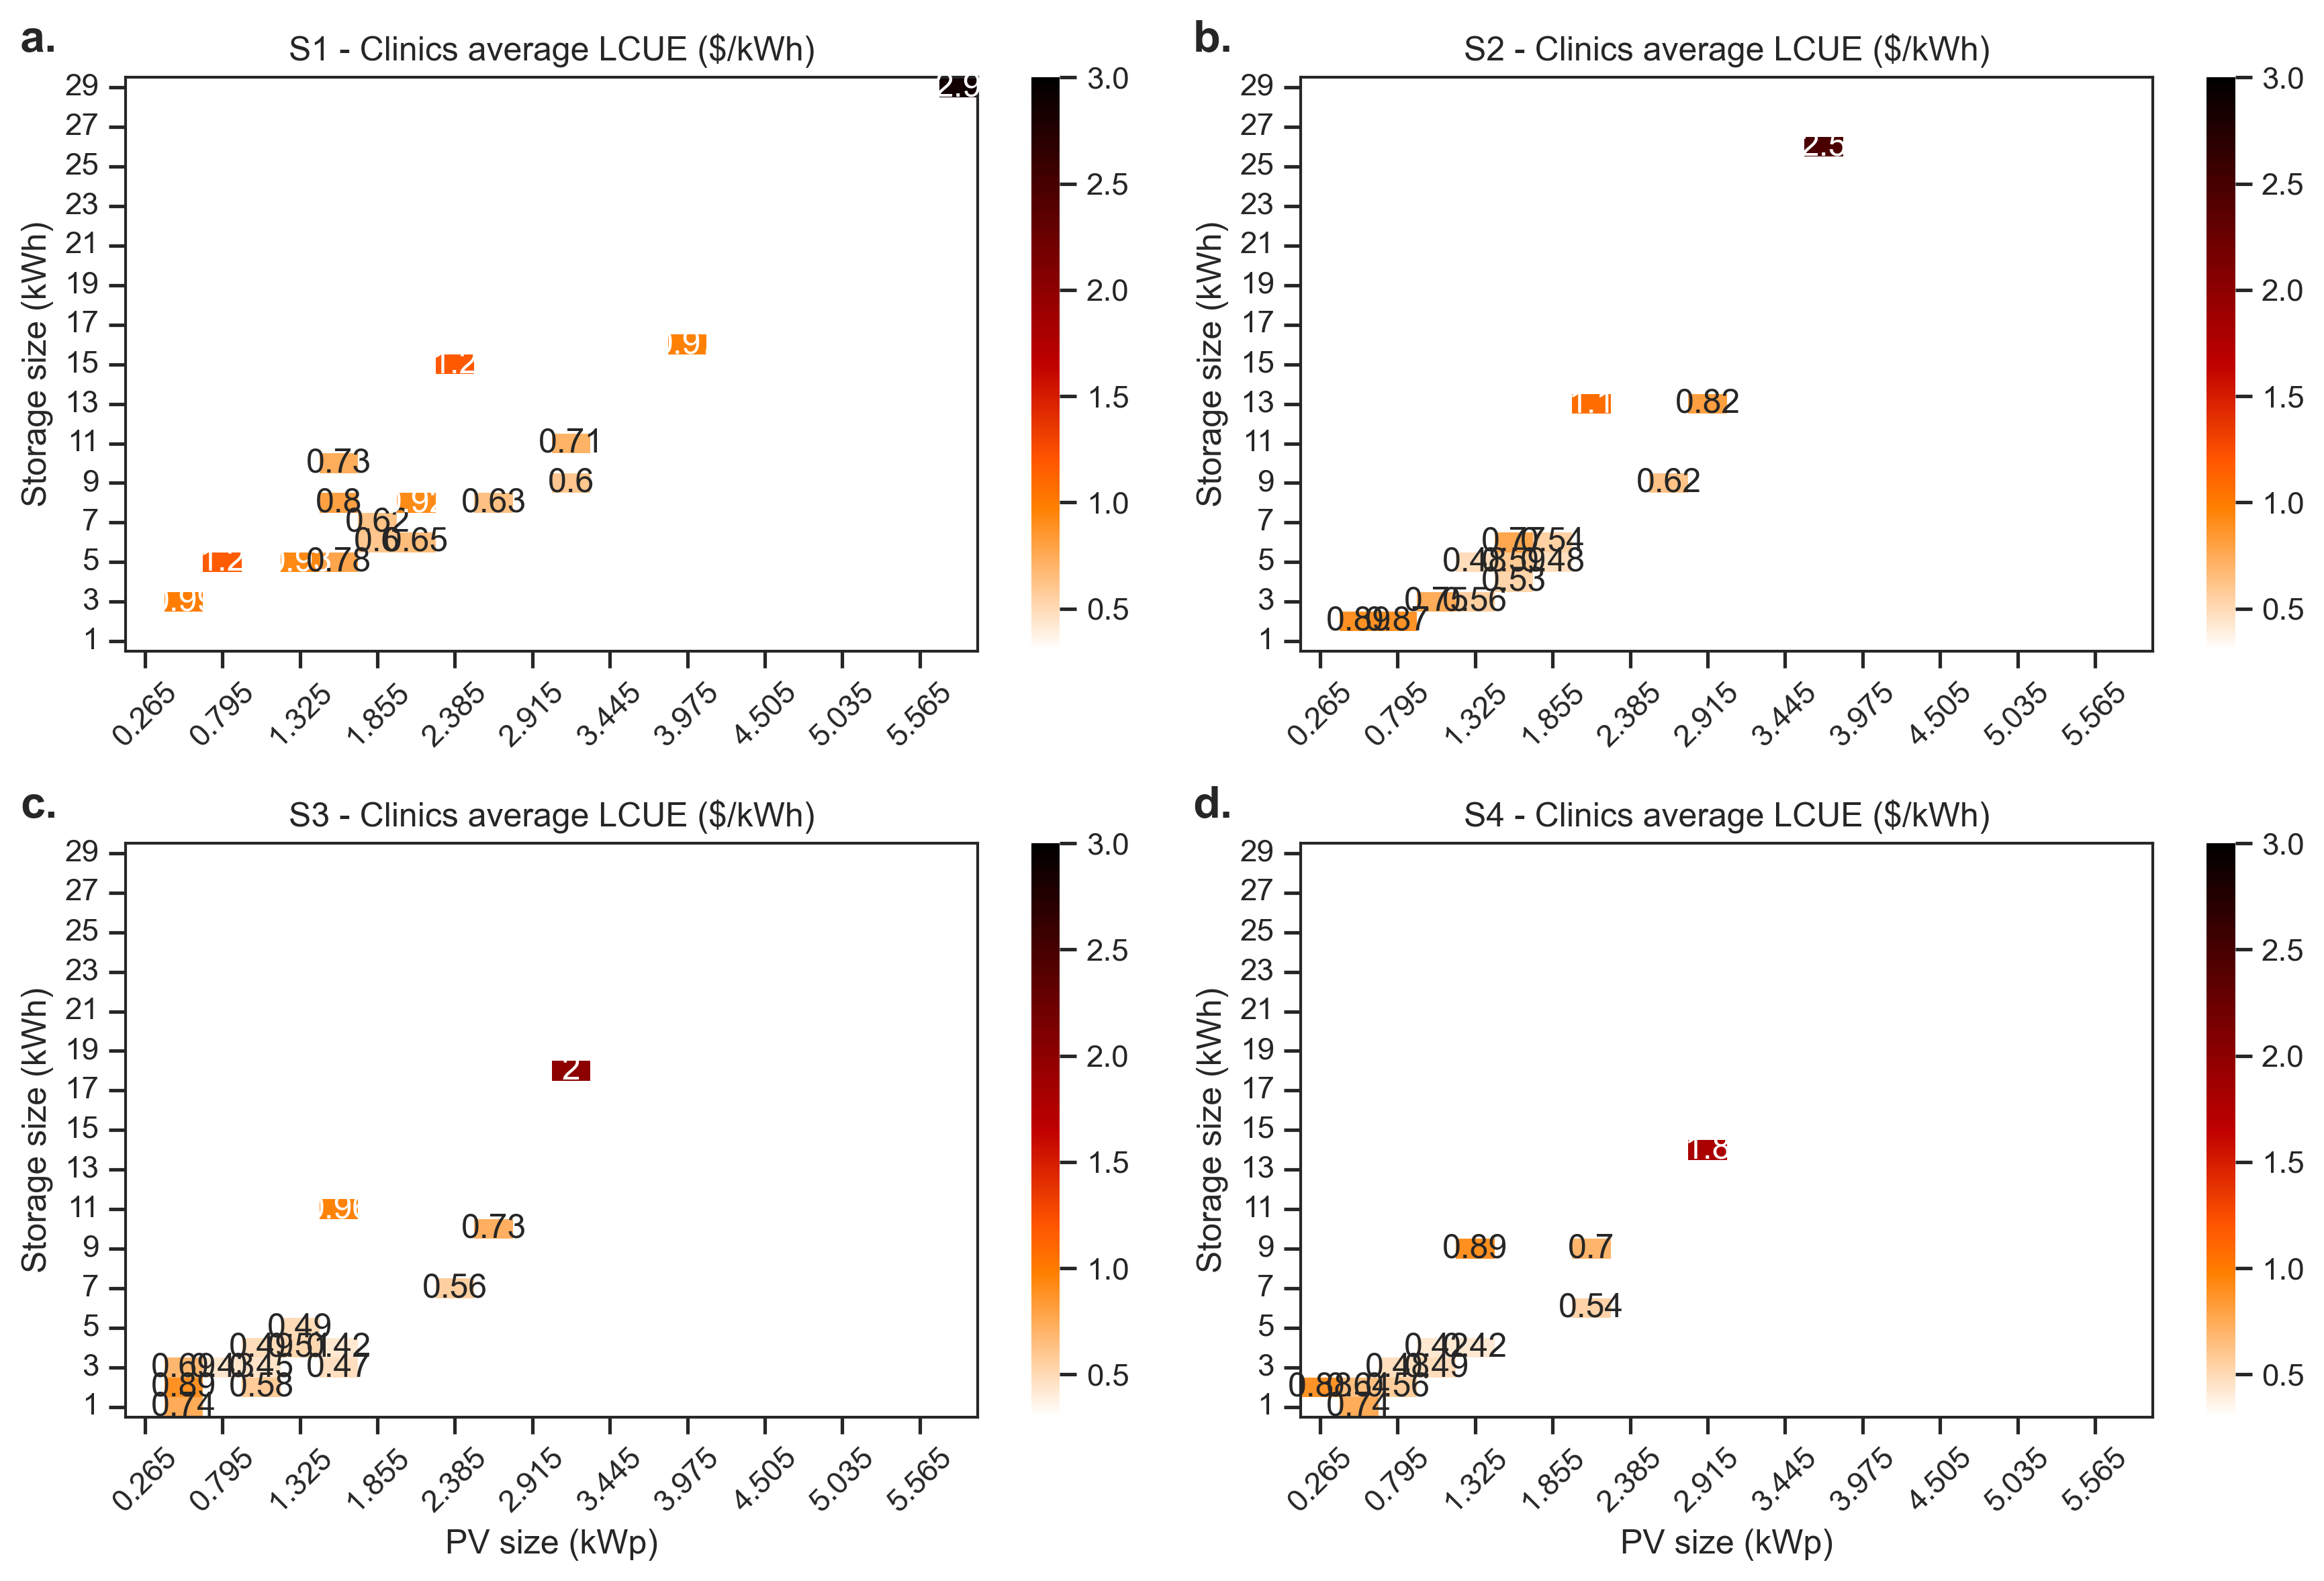

In [44]:
# Same plot as above but now extending axis of df to compare across scenarios 
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with with same axis and same colour scale
# To make subplots with same axis use variables ending with _ext (e.g., lcue_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_clinics_s1_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_clinics_s2_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_clinics_s3_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_clinics_s4_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r", annot=True,
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

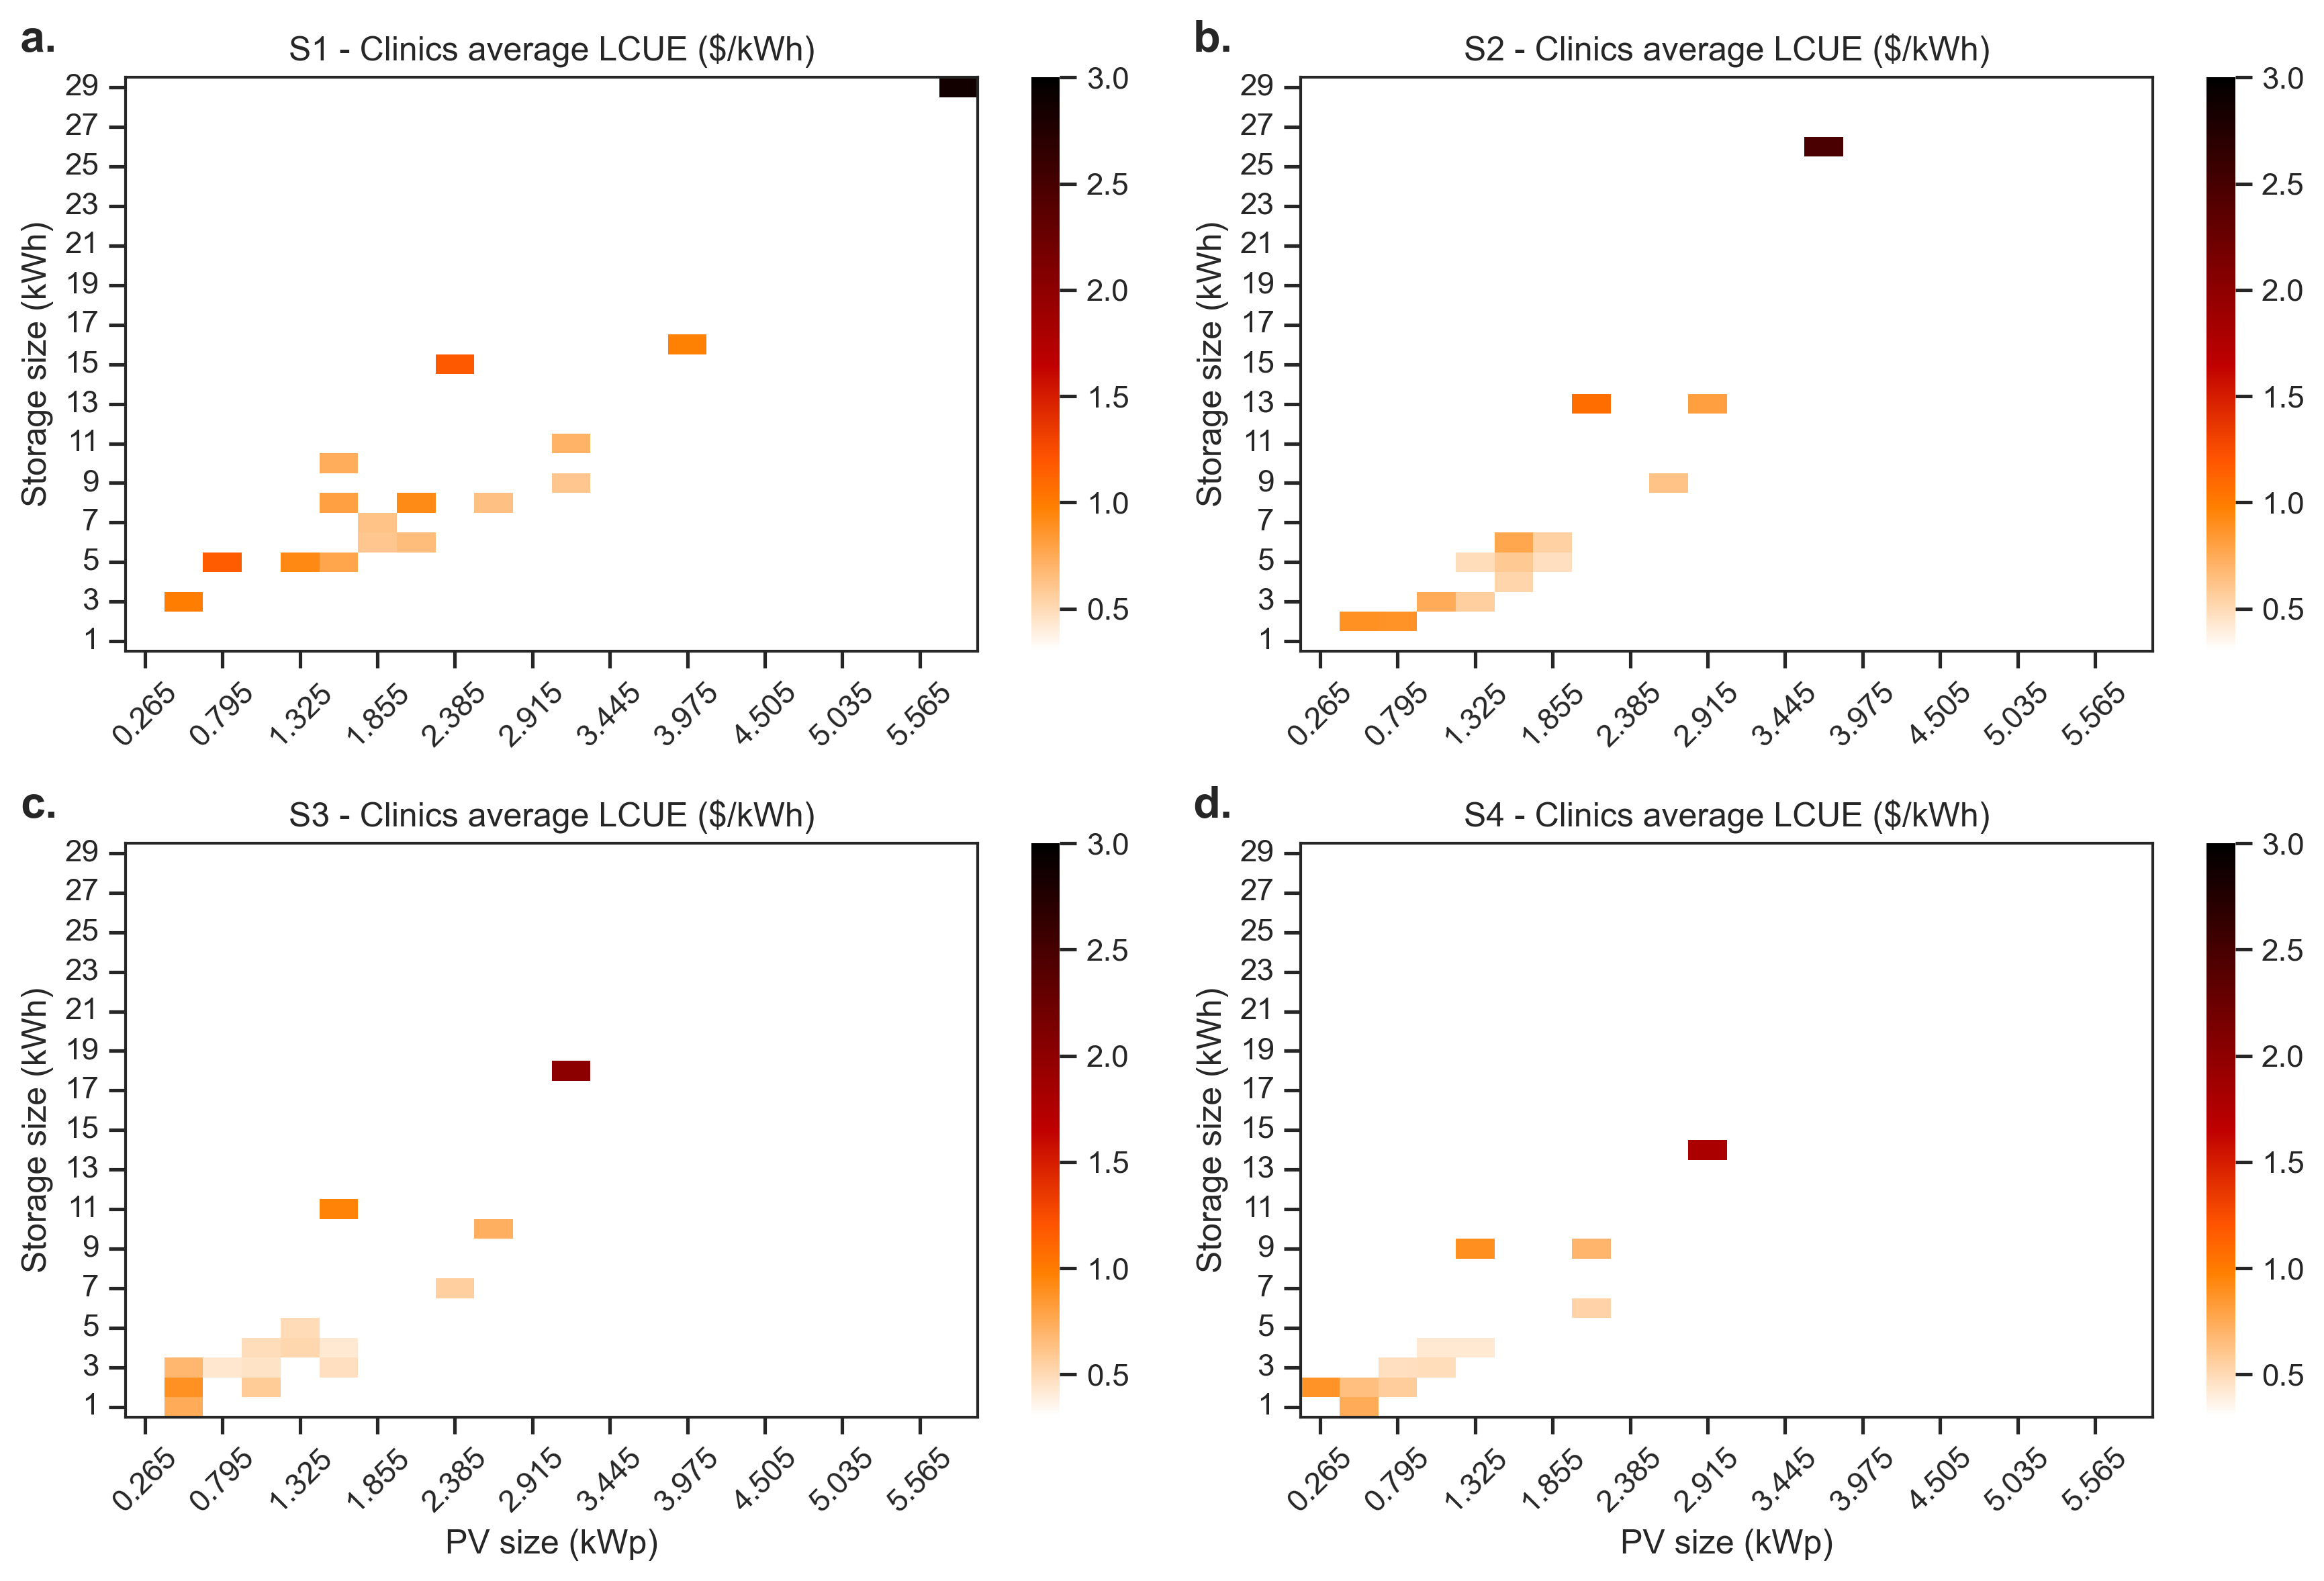

In [45]:
# Same plot as above but without annotations 
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with with same axis and same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., lcue_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_clinics_s1_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_clinics_s2_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_clinics_s3_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_clinics_s4_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
# axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

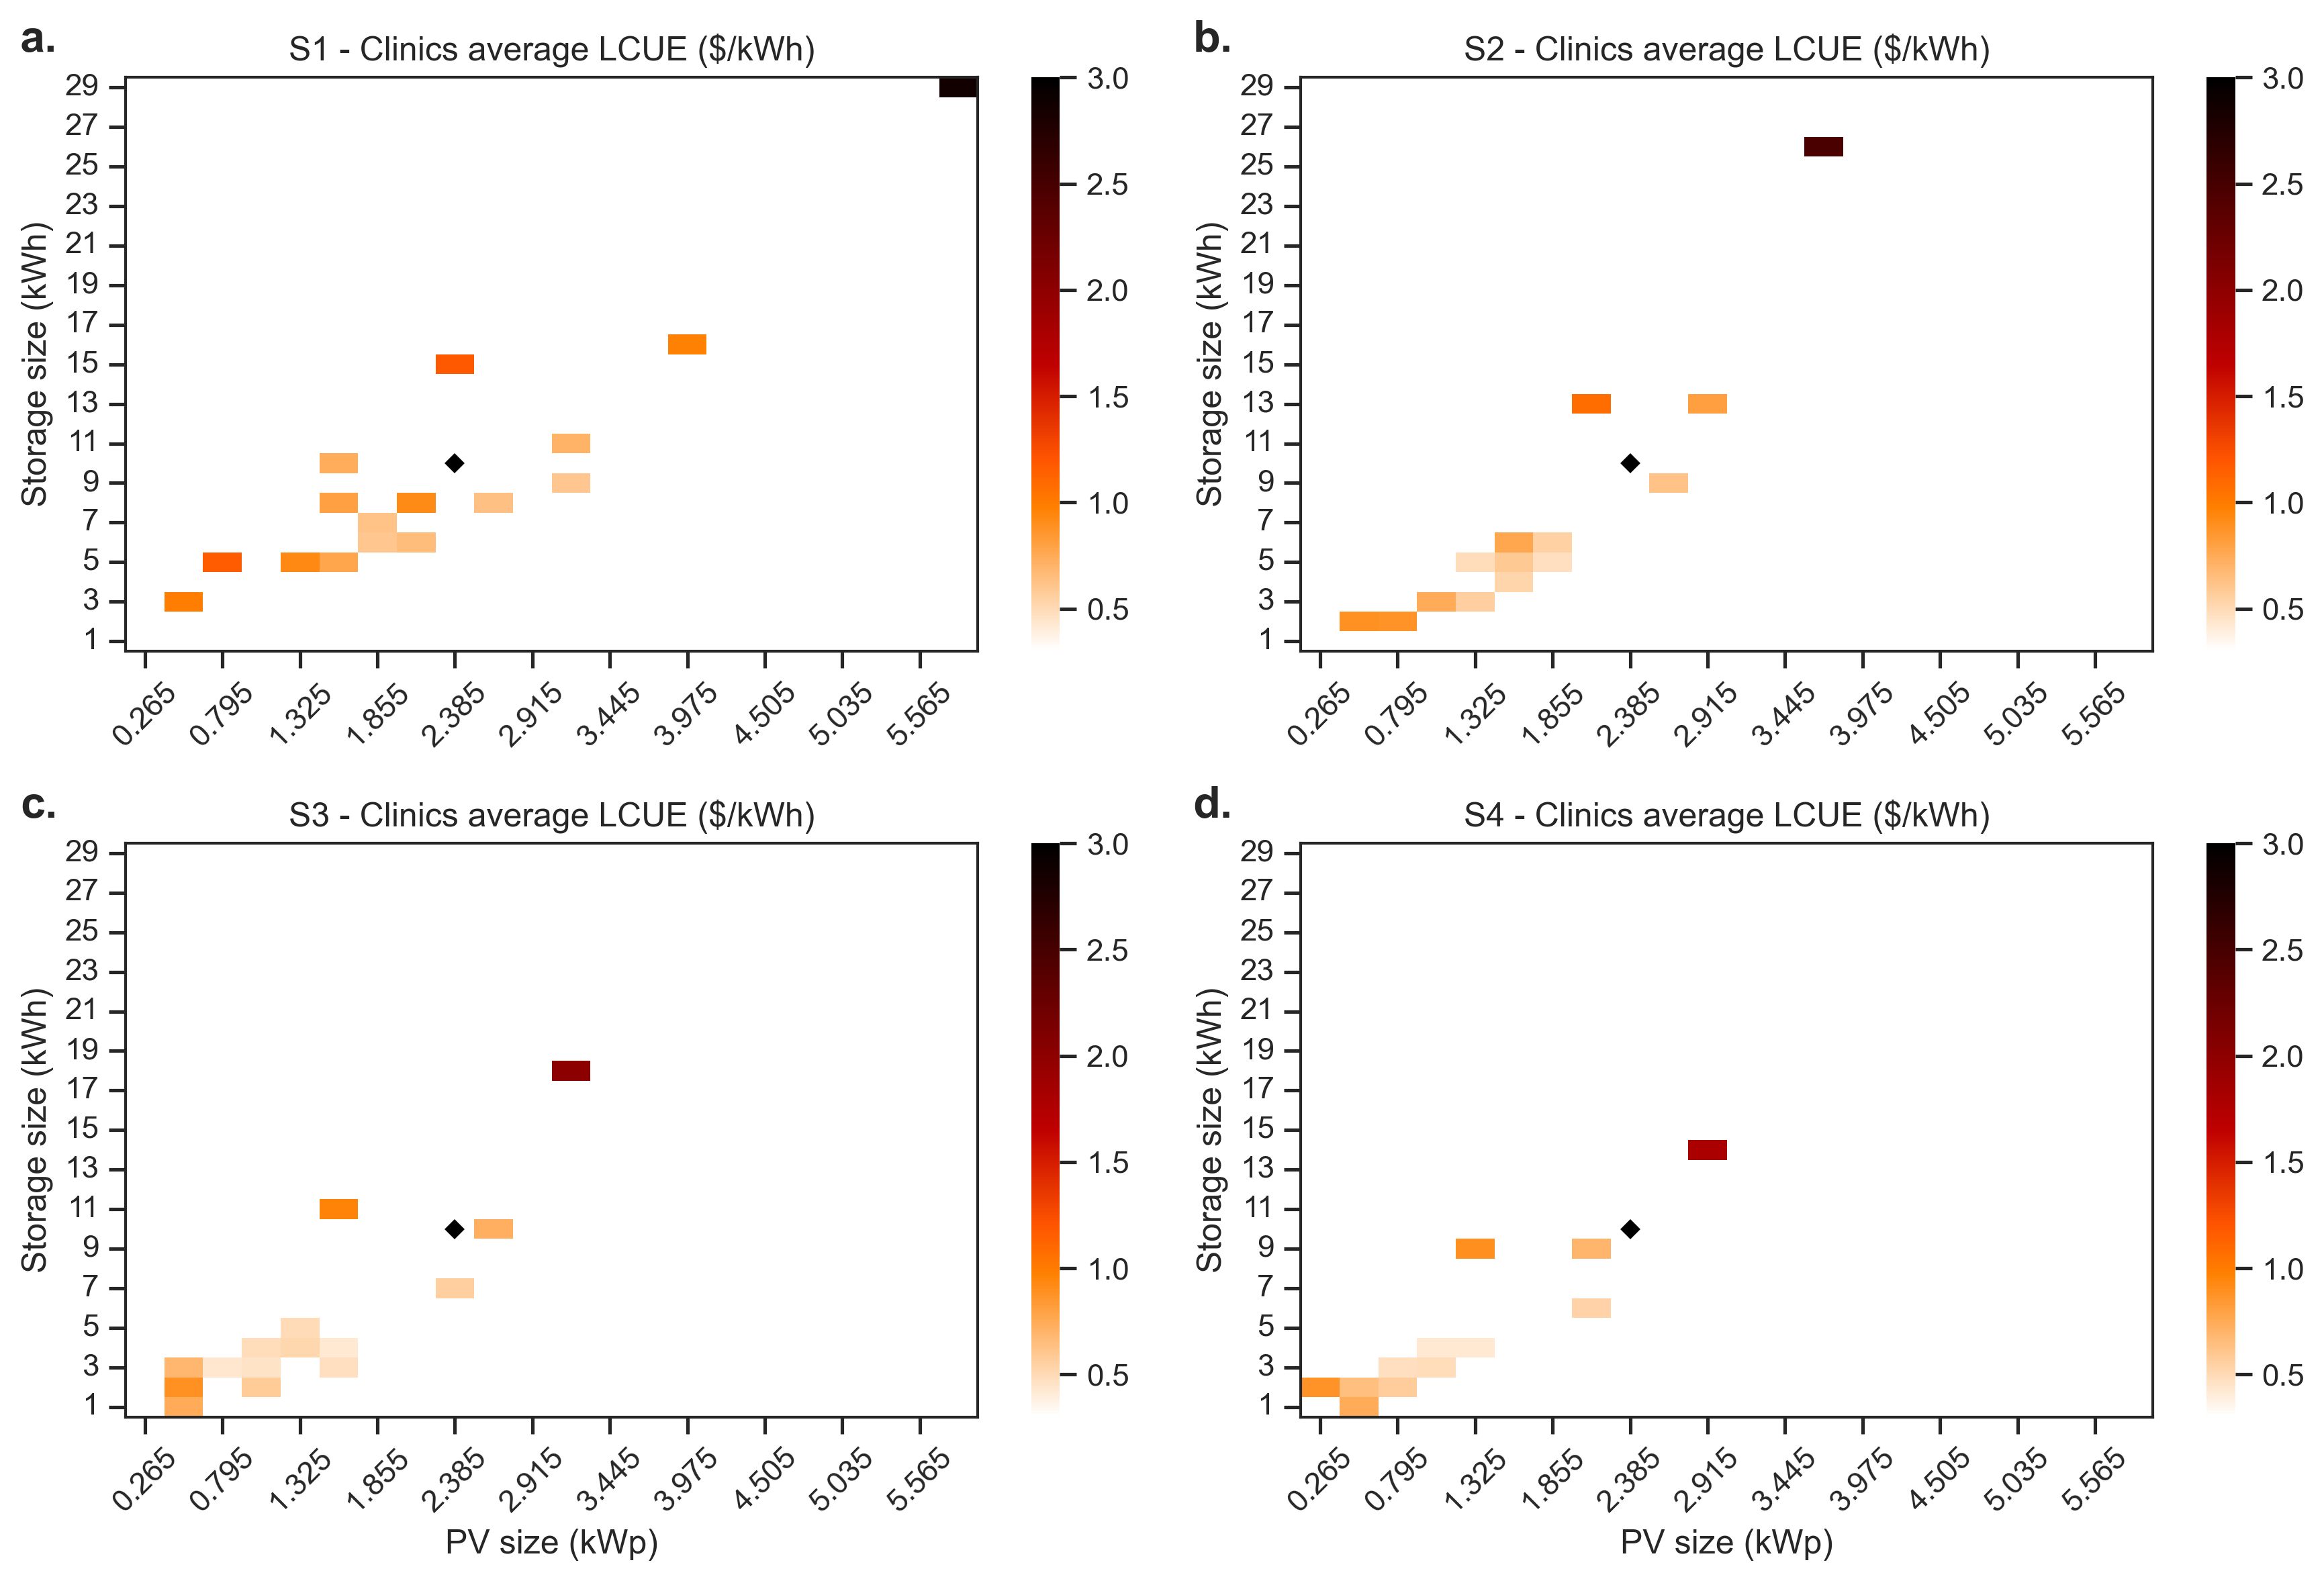

In [46]:
# Same plot as above but adding Rhino system as a data point/marker
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with same axis and same colour scale)
# To make subplots with same axis use variables ending with _ext (e.g., lcue_clinics_s1_hp_ext)
# comment Rhino marker for initial plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    lcue_clinics_s1_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    lcue_clinics_s2_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    lcue_clinics_s3_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    lcue_clinics_s4_hp_ext, vmin=0.3, vmax=3, cmap="gist_heat_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Clinics average LCUE ($/kWh)")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
# to add Rhino as data point (marker by matrix coordinates - not x and y axis values):
axis.plot(8.5,9.5, marker="D", color= "black", ms="4")  # or "dimgrey"

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [ ]:
# Last two plots are the final version used so far. So if I need to rerun this plot, don't
# do all the plots again. Just do the last two plots. 
# I added Rhino systems as a data point/marker but this only indicates the system size. 
# I was originally thinking of colouring the diamond marker with the average LCUE of clinics
# in S0 (around 1.05) but JN mentioned it didn't make sense to do this bc they are a spread.
# Instead show (boxplot?) of LCUE of S0 per institution type. 